<a href="https://colab.research.google.com/github/scottthomaswx/RadarHodographs/blob/main/RadarHodograph_Loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Needed Packages

In [95]:
# @title
%%capture
!pip install matplotlib
!pip install numpy
!pip install arm-pyart
!pip install metpy
!pip install nexradaws
!pip install pytz
!pip install datetime
!pip install pint
!pip install math
!pip install requests
!pip install os
!pip install pandas
!pip install warnings

import matplotlib.pyplot as plt
from metpy.units import units
import pyart
import numpy as np
from metpy.plots import Hodograph
import nexradaws
import pytz
import metpy.calc as mpcalc
from datetime import datetime
import matplotlib.colors as colors
from pint import UnitRegistry
import math
import requests
import os
import pandas as pd
import warnings

!mkdir radar_data
!mkdir cf_radial
!rm -rf sample_data
!mkdir sr_hodos
!mkdir hodos

#Get Needed Parameters

In [24]:
#Time and Time Zone
timezone = 'UTC'
tz = pytz.timezone(timezone) #Note Format for US Timezones is 'US/Eastern', 'US/Central' etc...
start = tz.localize(datetime(2023,8,24,23,0))
end = tz.localize(datetime(2023,8,25,2,30))

#Radar
radar_id = 'KGRR' #Make Uppercase

In [ ]:
#Storm Motion
storm_motion_method = 'Bunkers Right' #Choose Mean Wind, Bunkers Left, Bunkers Right, User Selected, Corfidi Downshear, Corfidi Upshear

#Enter User Selected Storm Motion

sm_dir = 999 #Enter 999 If Not Using
sm_speed = 999 #Enter 999 If Not Using

#Surface Winds

sfc_dir = 777 #Enter 999 If Not Using or 777 To Pull Via Synoptic API
sfc_spd = 777 #Enter 999 If Not Using 777 or To Pull Via Synoptic API
nearest_asos = 'KGRR' #Enter 999 If Not Using

#Plot Info

range_type = 'Static' #Enter Dynamic For Changing Range From Values or Static for Constant Range Value
static_value = 70 # Enter Static Hodo Range or 999 To Not Use

In [99]:
!rm -rf radar_data
!rm -rf cf_radial
!mkdir radar_data
!mkdir cf_radial


#Establish AWS Connection

In [25]:
# @title
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))

There are 37 scans available between 2023-08-24 23:00:00+00:00 and 2023-08-25 02:30:00+00:00



#Download Radar Data

In [100]:
# @title
%%capture
results = conn.download(scans[0:], '/content/radar_data')

#Select file of choice from radar_data folder and copy path below

/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 16.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 18.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 19.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/io/cfradial.py:412: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/usr/local/lib/python3.10/dist-packages/pyart/io/cfradial.py:412: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/usr/local/lib/python3.10/dist-packages/pyart/retrieve/vad.py:336: RuntimeWa

max height 16818.0  meters
min height 20.0  meters


/usr/local/lib/python3.10/dist-packages/pyart/retrieve/vad.py:415: UserWarning: Warning: converting a masked element to nan.
  y_new[i] = np.average(y_in_window, weights=weights)


max height 16312.0  meters
min height 18.0  meters
max height 18732.0  meters
min height 29.0  meters
max height 19127.0  meters
min height 31.0  meters
max height 22843.0  meters
min height 48.0  meters
max height 22646.0  meters
min height 47.0  meters
max height 27194.0  meters
min height 68.0  meters
max height 30268.0  meters
min height 82.0  meters
max height 36103.0  meters
min height 110.0  meters
max height 42871.0  meters
min height 141.0  meters
max height 17038.0  meters
min height 21.0  meters
max height 16312.0  meters
min height 18.0  meters
max height 18908.0  meters
min height 30.0  meters
max height 19172.0  meters
min height 31.0  meters
max height 52095.0  meters
min height 184.0  meters
max height 62316.0  meters
min height 232.0  meters
max height 75011.0  meters
min height 291.0  meters
max height 90629.0  meters
min height 363.0  meters
max height 110253.0  meters
min height 455.0  meters
max height 133752.0  meters
min height 565.0  meters
max height 163189.0  

/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 20.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 21.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 22.
  warnings.warn(msg, UserWarning)


max height 16510.0  meters
min height 19.0  meters
max height 16664.0  meters
min height 20.0  meters
max height 19546.0  meters
min height 33.0  meters
max height 19480.0  meters
min height 33.0  meters
max height 16884.0  meters
min height 21.0  meters
max height 16664.0  meters
min height 20.0  meters
max height 23239.0  meters
min height 50.0  meters
max height 22997.0  meters
min height 49.0  meters
max height 27326.0  meters
min height 69.0  meters
max height 17280.0  meters
min height 22.0  meters
max height 16664.0  meters
min height 20.0  meters
max height 32353.0  meters
min height 92.0  meters
max height 36081.0  meters
min height 110.0  meters
max height 43200.0  meters
min height 143.0  meters
max height 52008.0  meters
min height 184.0  meters
max height 62642.0  meters
min height 233.0  meters
max height 17192.0  meters
min height 22.0  meters
max height 16664.0  meters
min height 20.0  meters
max height 74882.0  meters
min height 290.0  meters
max height 91016.0  meters

/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 3.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 5.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 7.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 8.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pyart/correct/region_dealias.py:322

max height 16444.0  meters
min height 19.0  meters
max height 16312.0  meters
min height 18.0  meters
max height 18666.0  meters
min height 29.0  meters
max height 19480.0  meters
min height 33.0  meters
max height 22558.0  meters
min height 47.0  meters
max height 22997.0  meters
min height 49.0  meters
max height 27260.0  meters
min height 69.0  meters
max height 30465.0  meters
min height 83.0  meters
max height 36103.0  meters
min height 110.0  meters
max height 43134.0  meters
min height 142.0  meters
max height 51703.0  meters
min height 182.0  meters
max height 17500.0  meters
min height 23.0  meters
max height 16664.0  meters
min height 20.0  meters
max height 19084.0  meters
min height 31.0  meters
max height 19480.0  meters
min height 33.0  meters
max height 22360.0  meters
min height 46.0  meters
max height 22997.0  meters
min height 49.0  meters
max height 62773.0  meters
min height 234.0  meters
max height 75098.0  meters
min height 291.0  meters
max height 91102.0  meters

TypeError: Unknown or unsupported file format: UNKNOWN

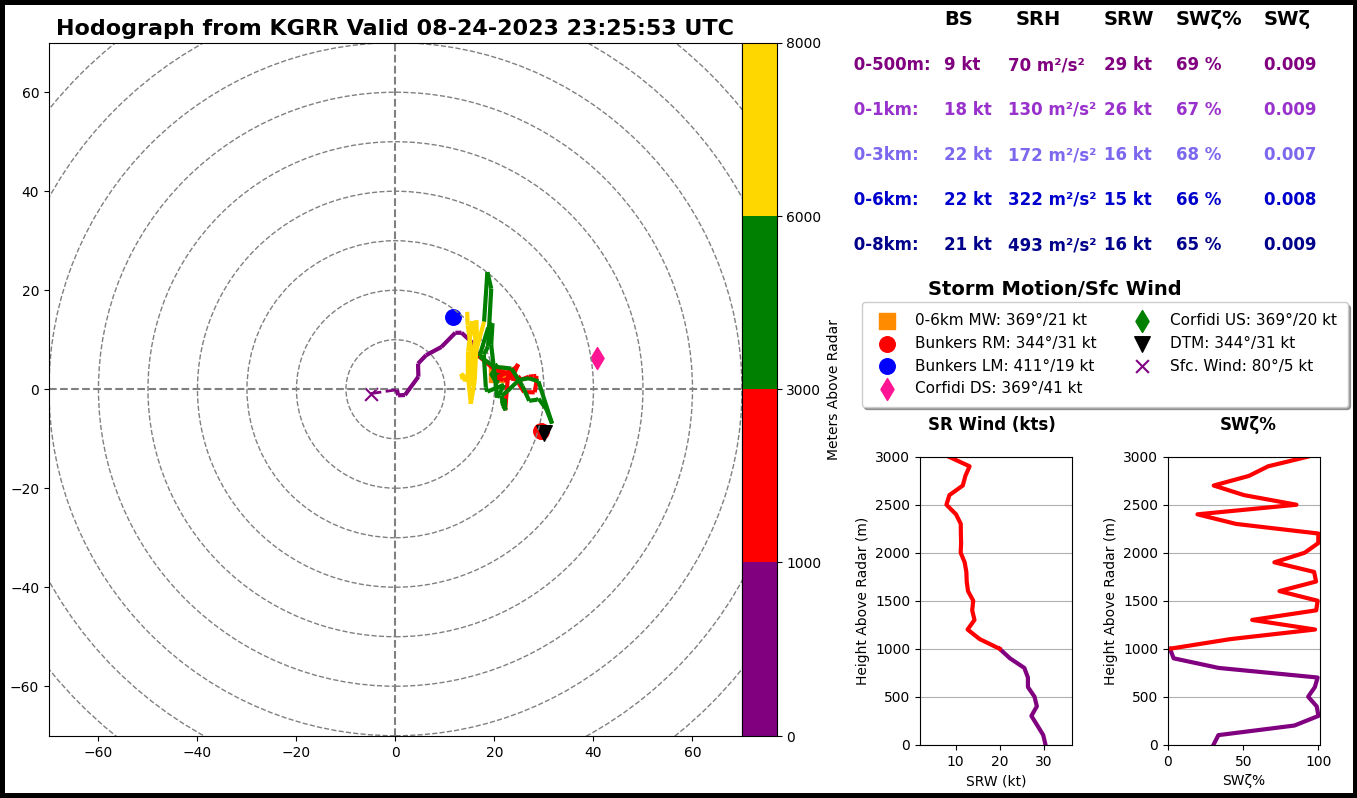

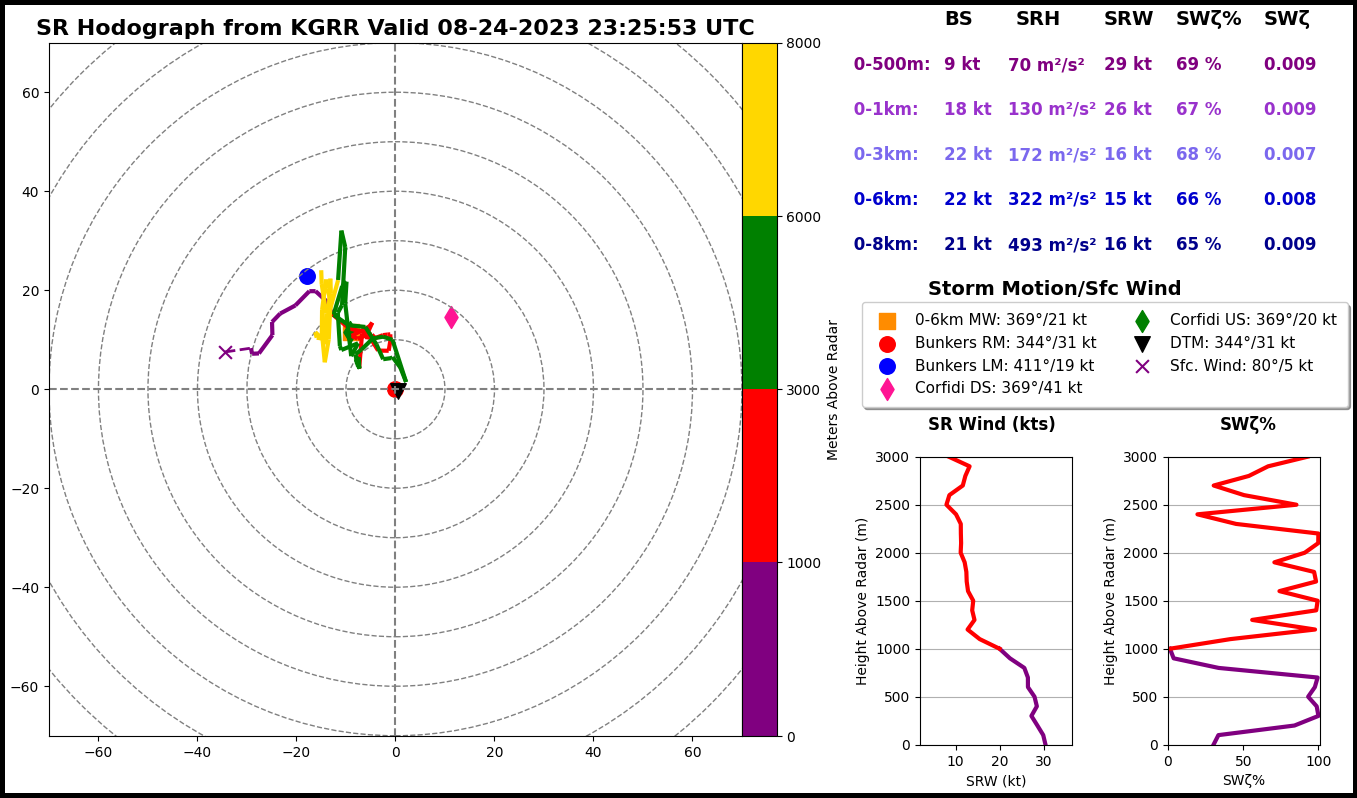

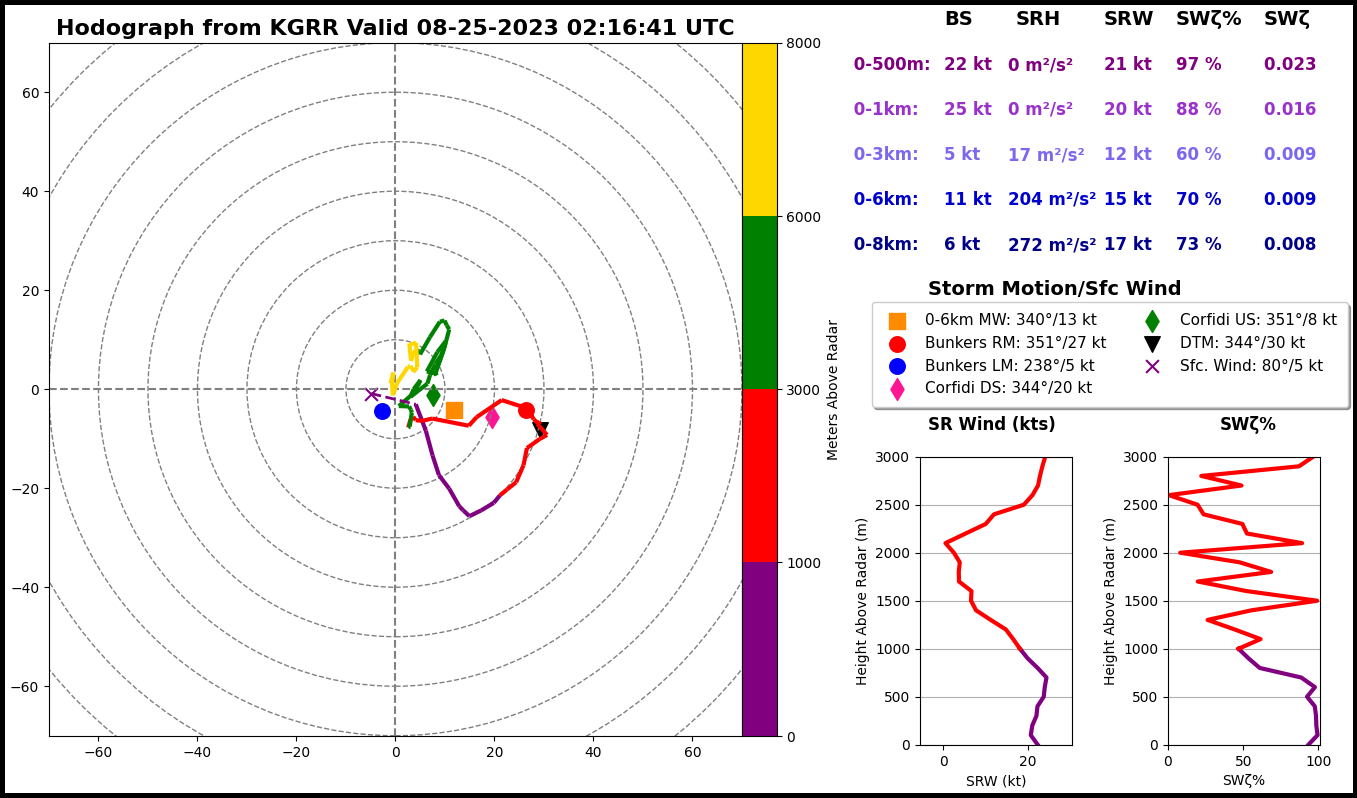

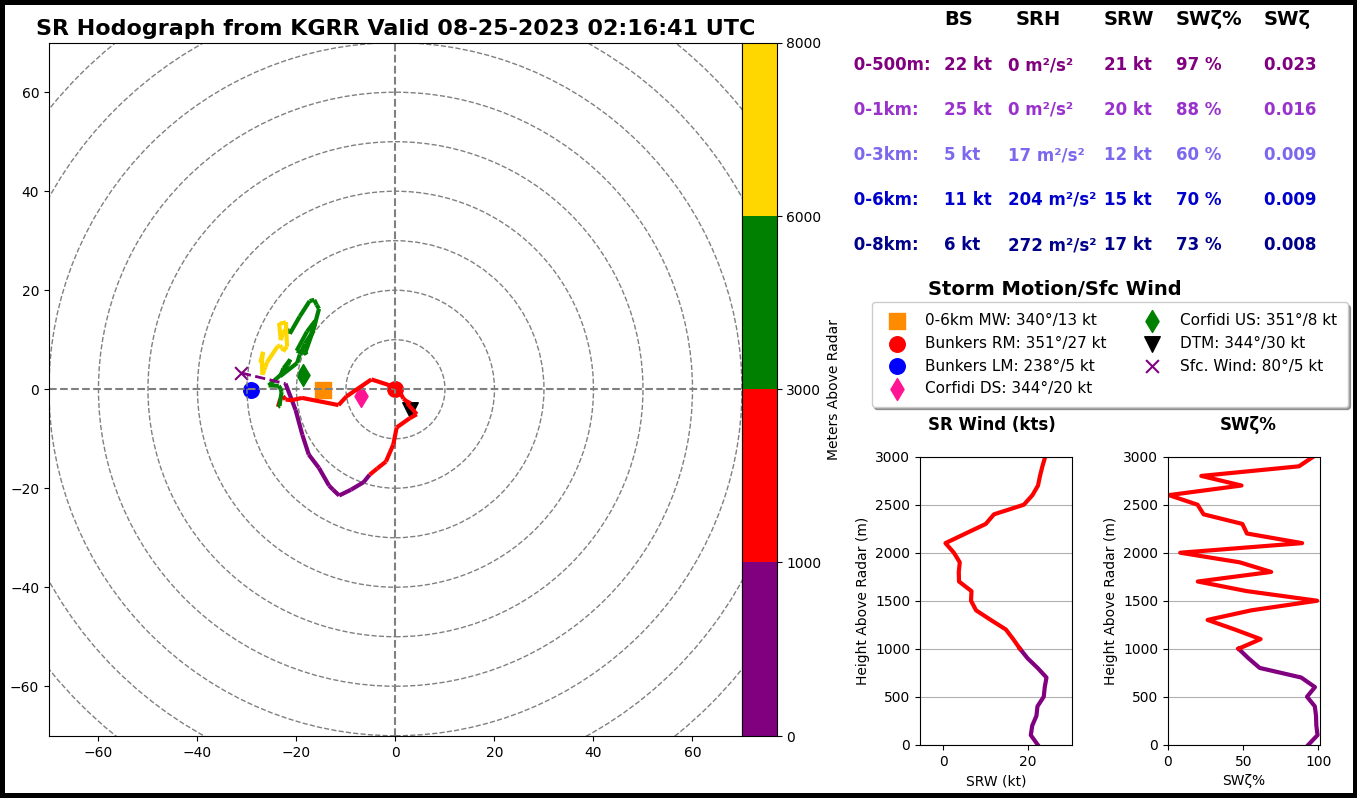

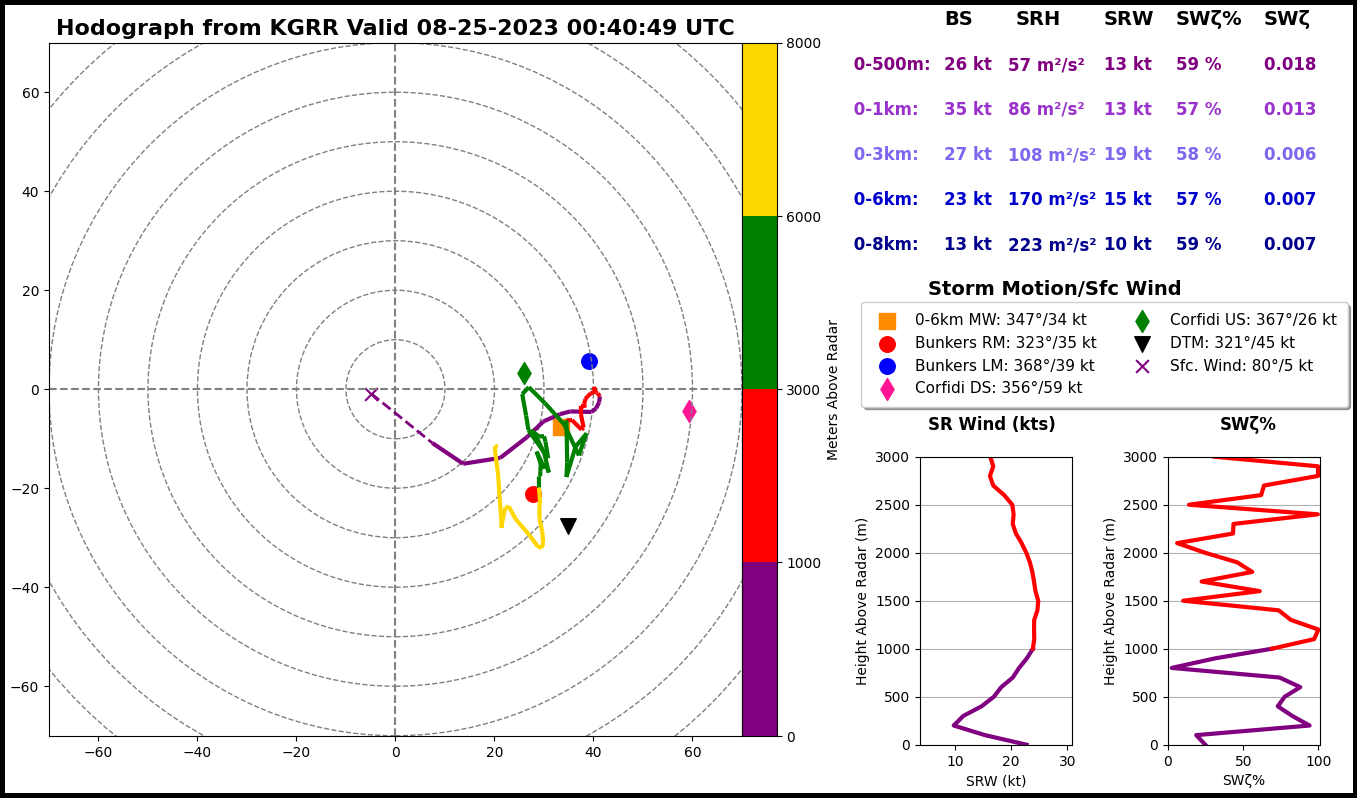

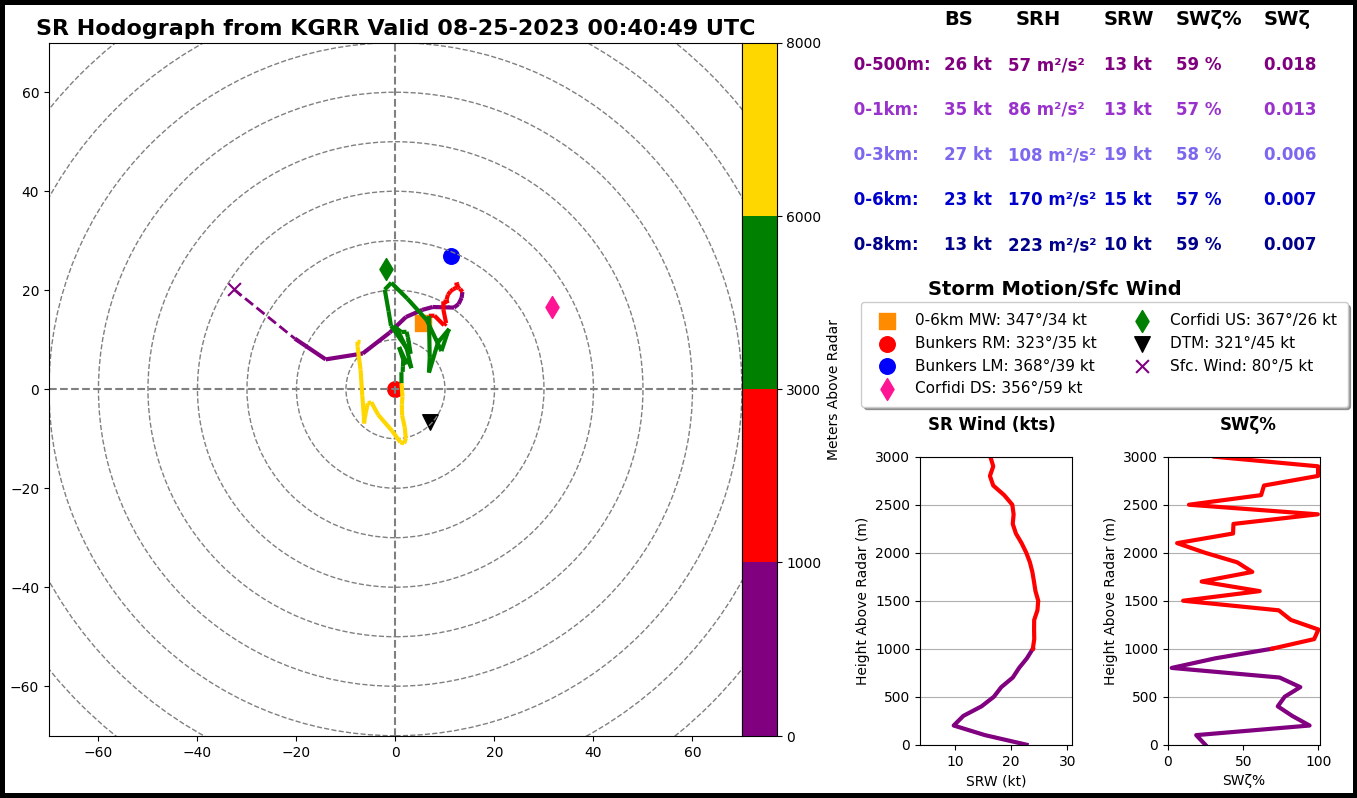

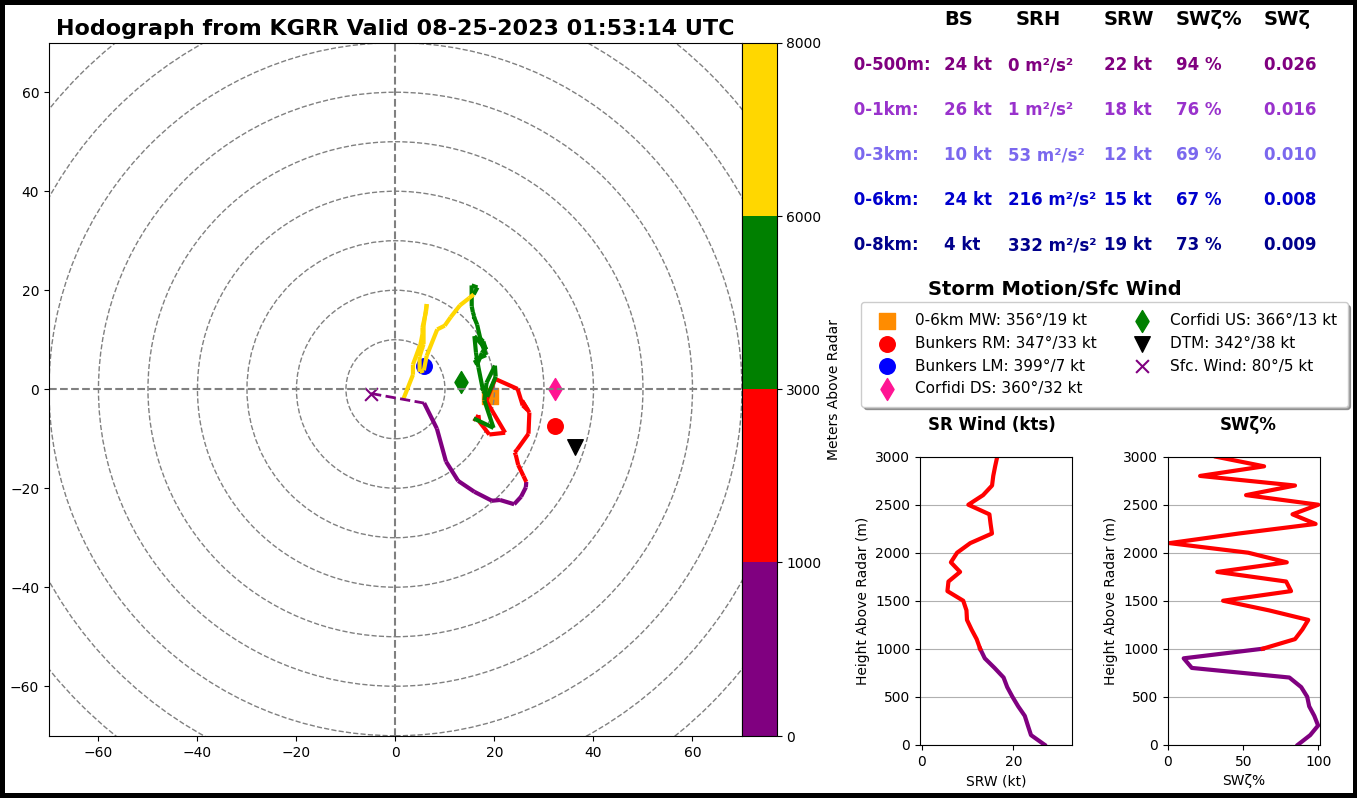

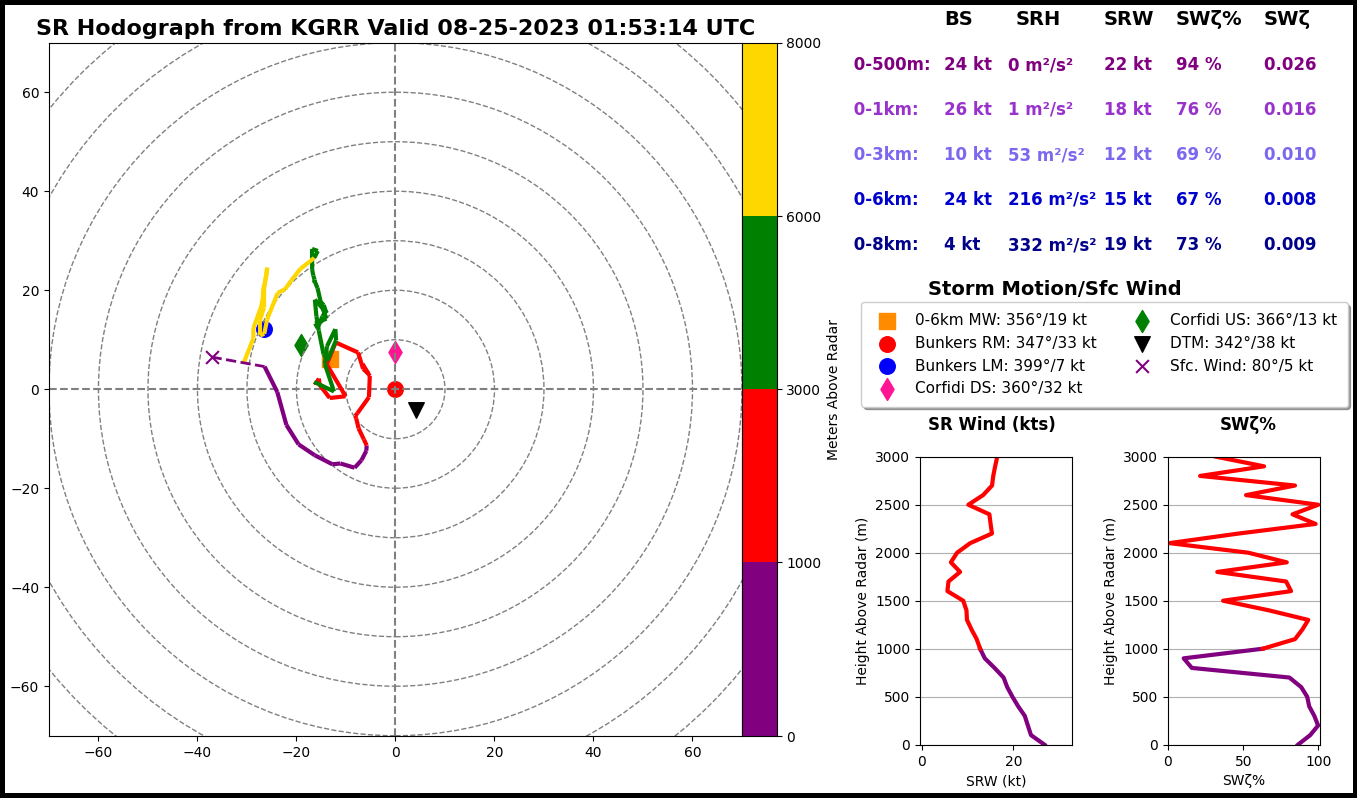

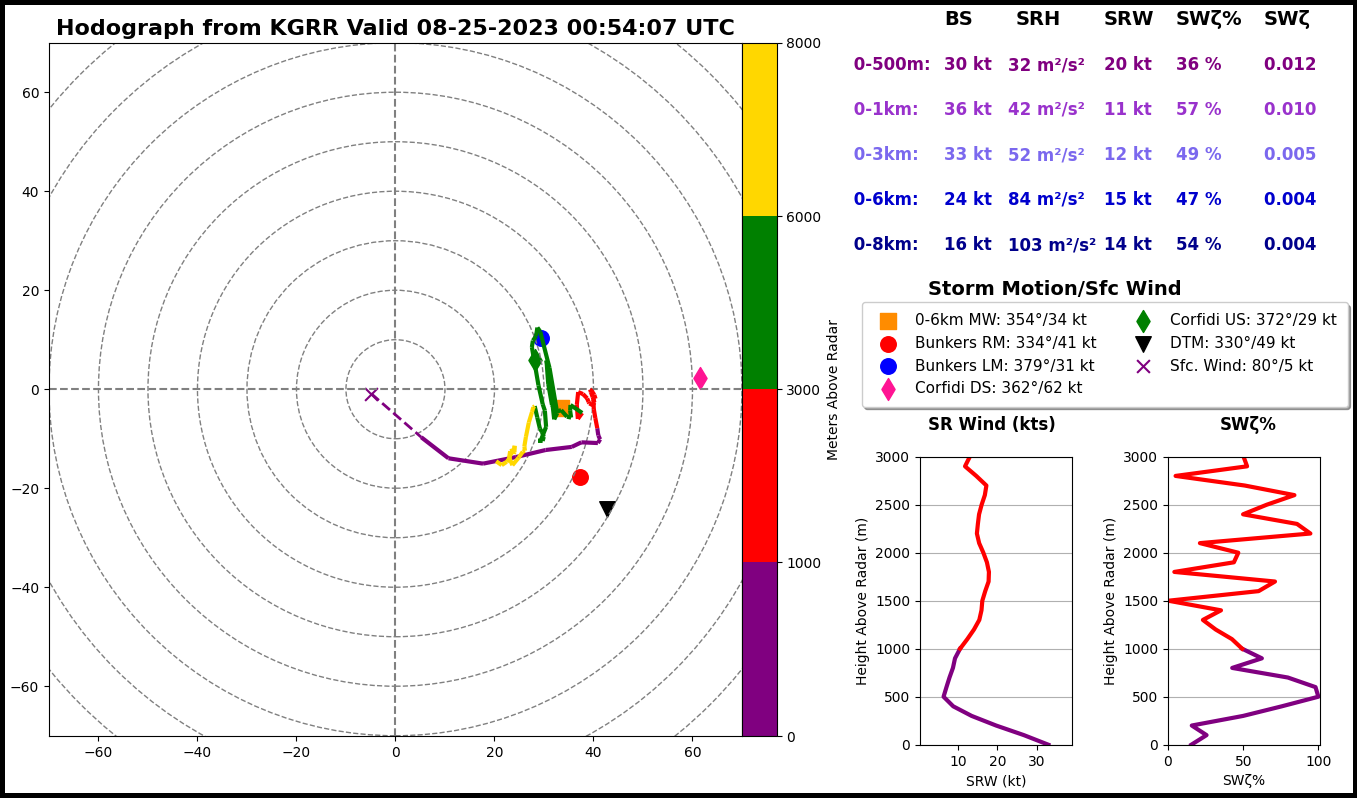

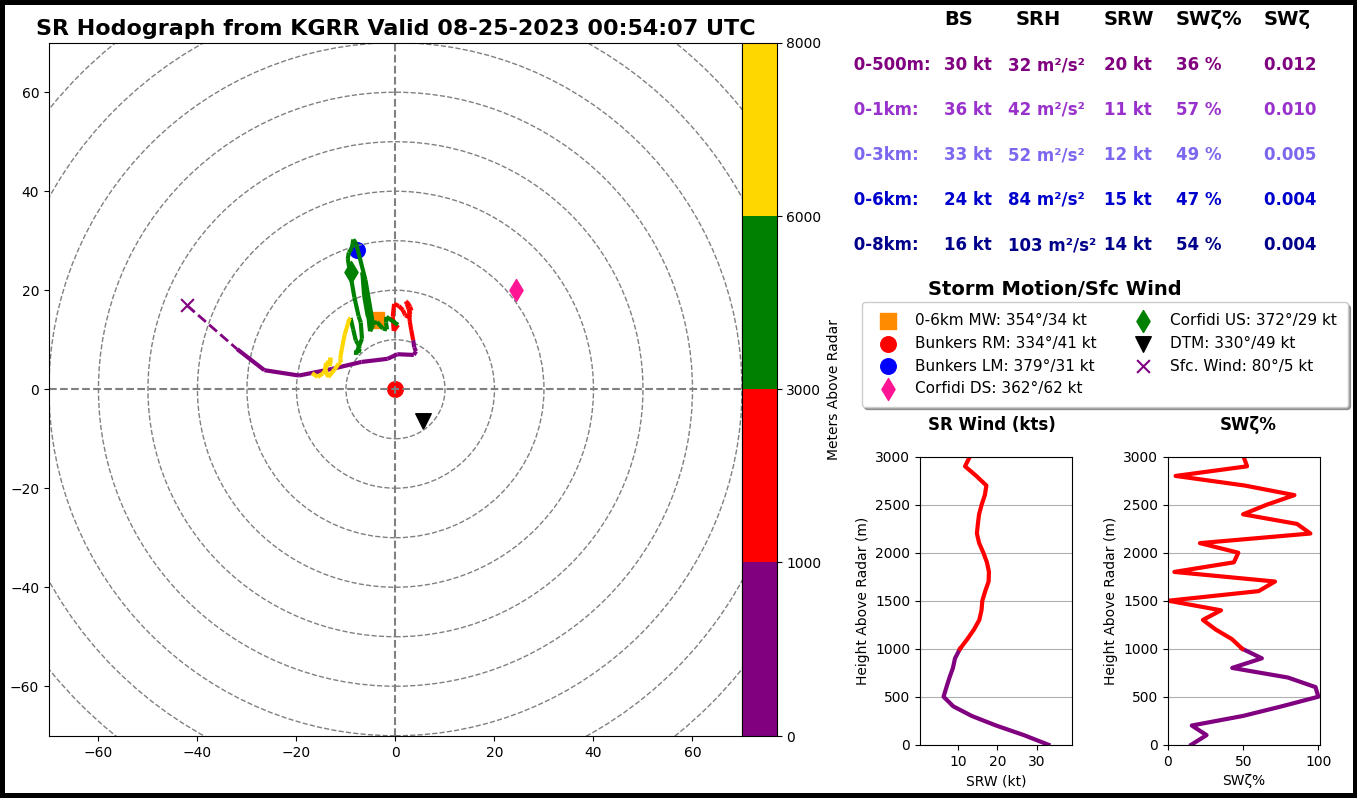

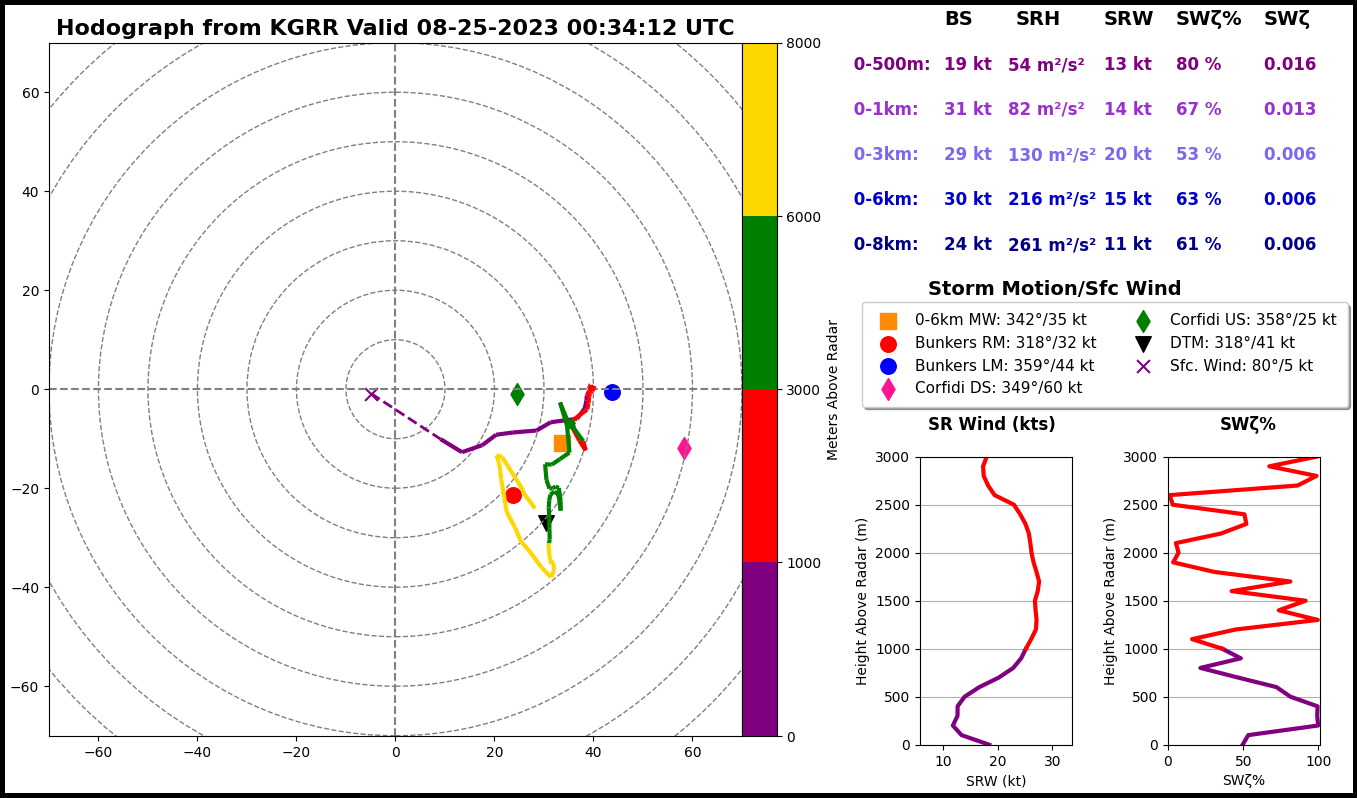

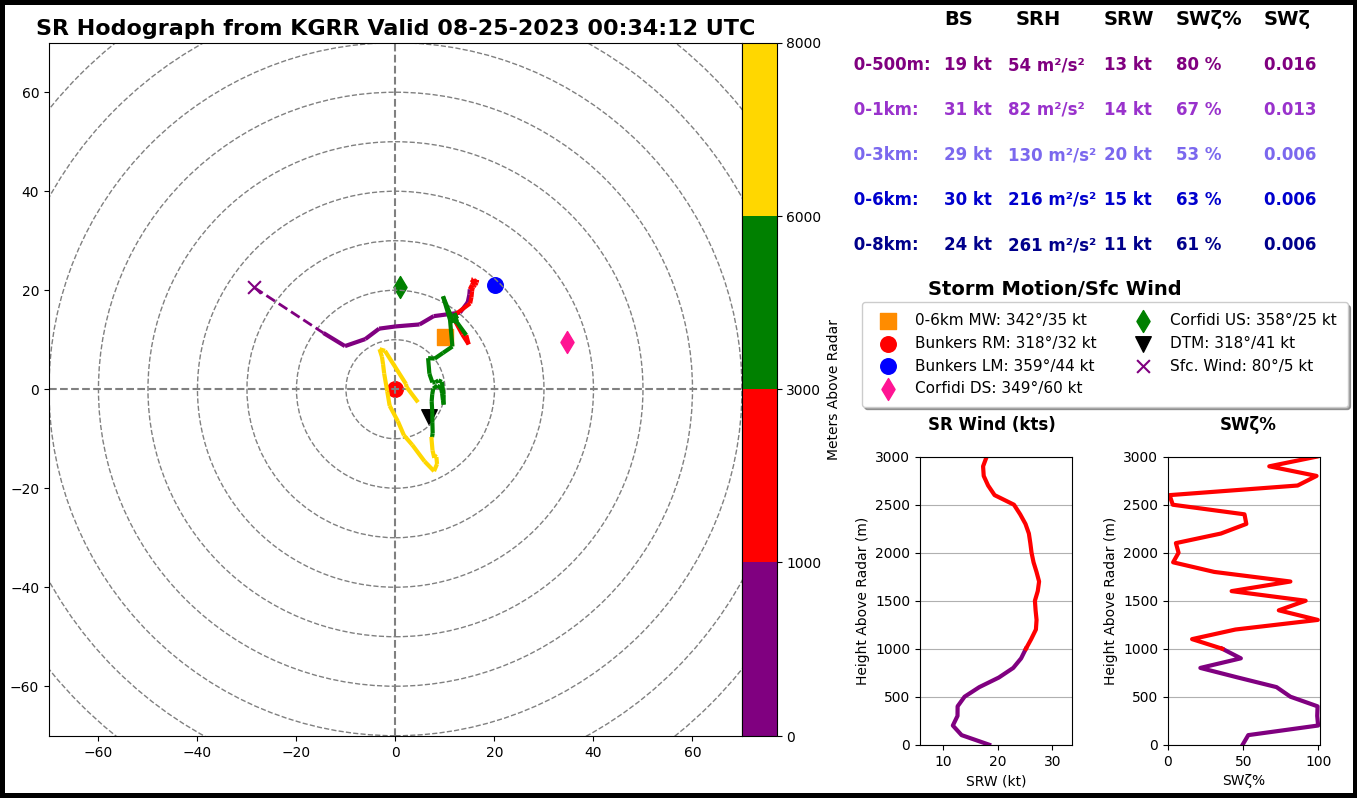

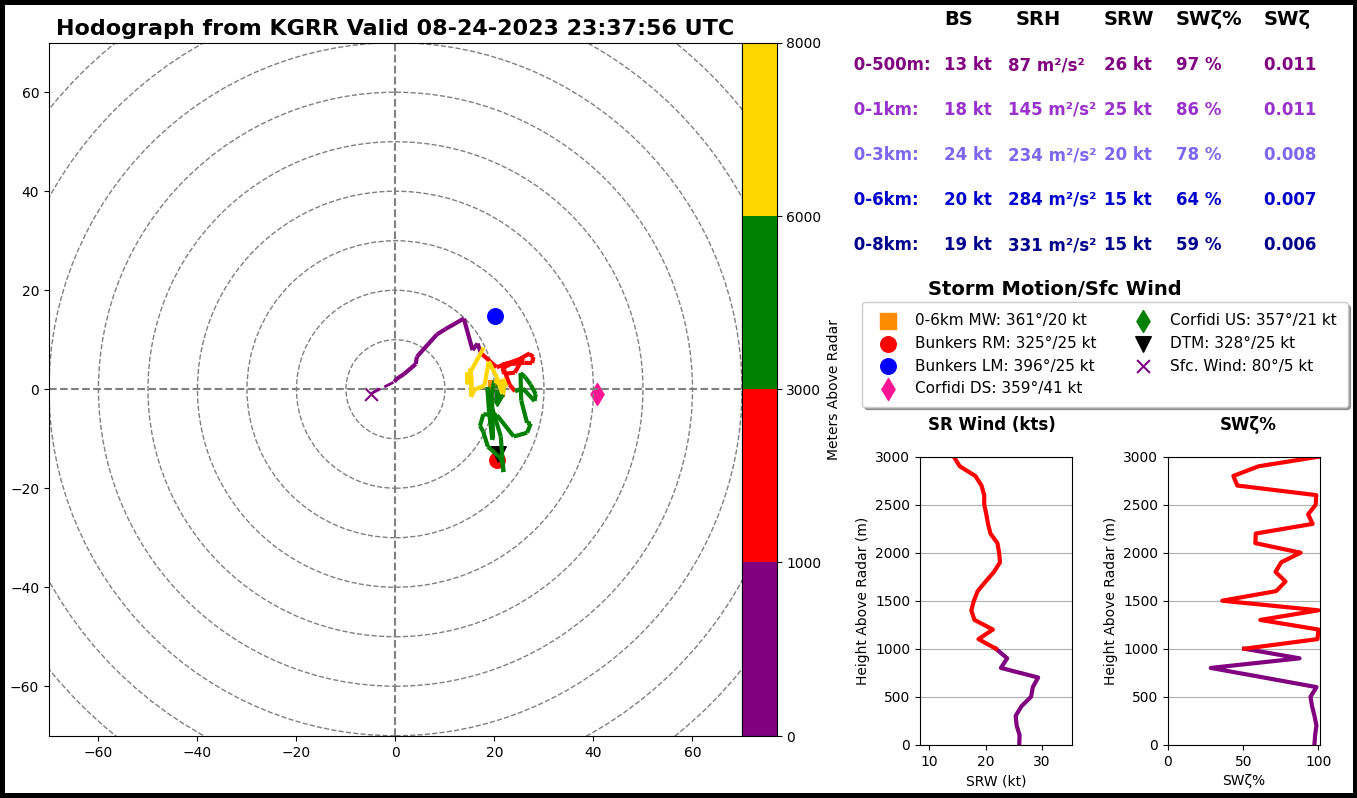

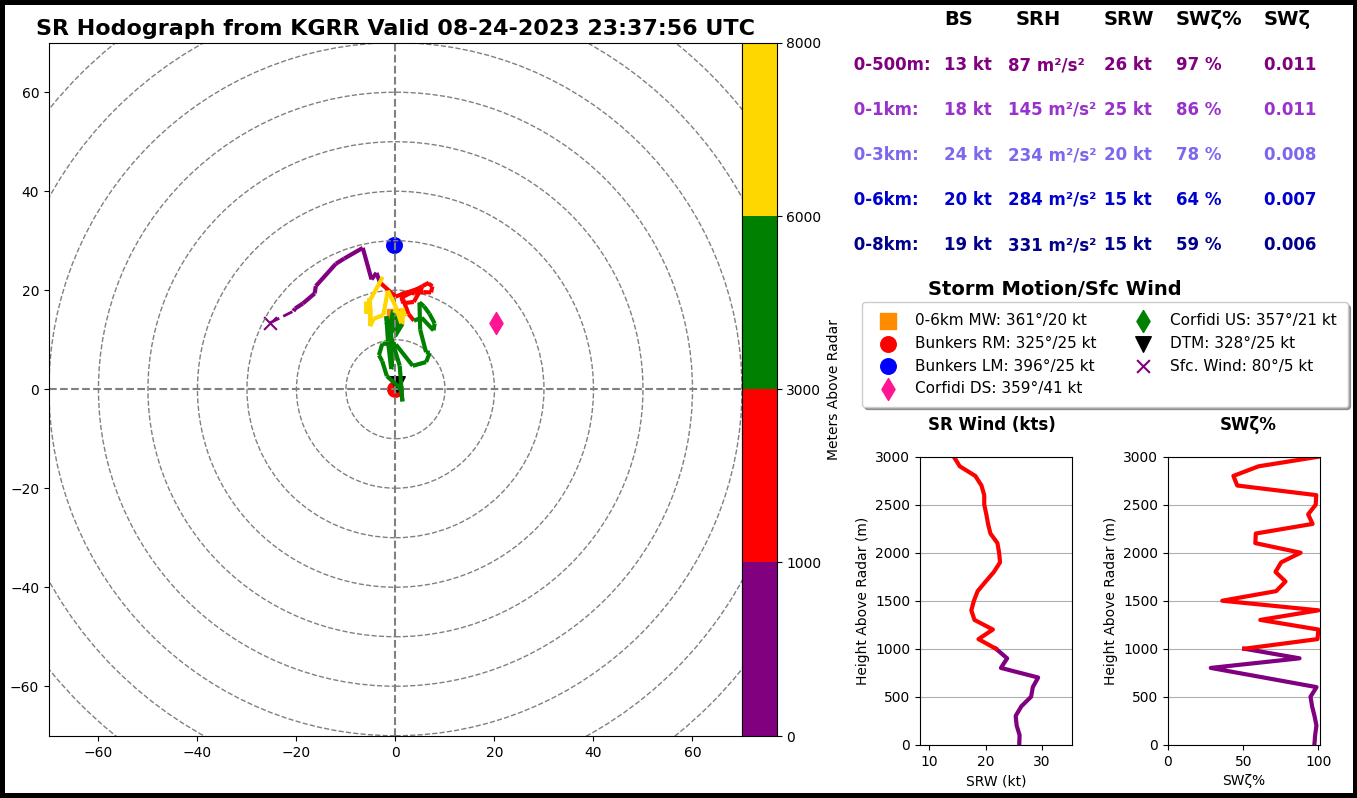

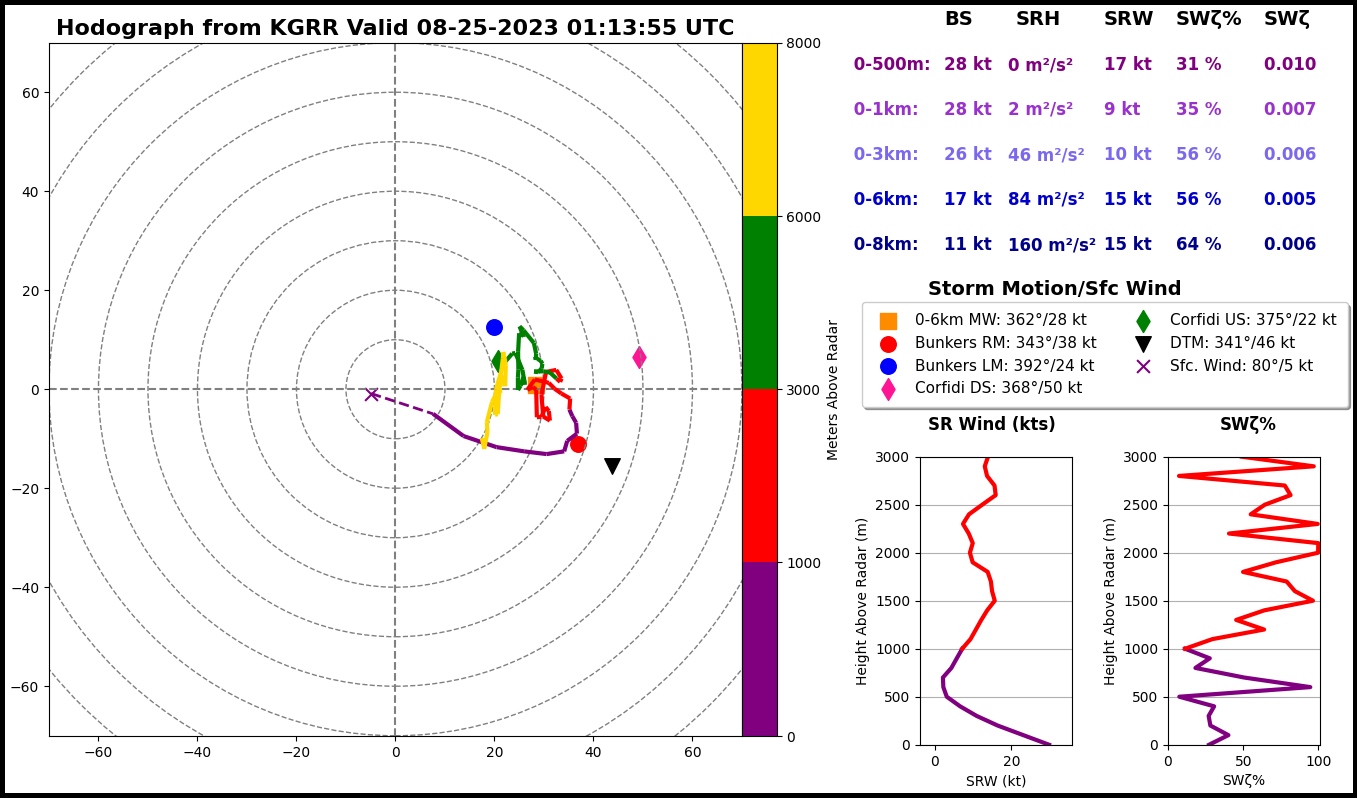

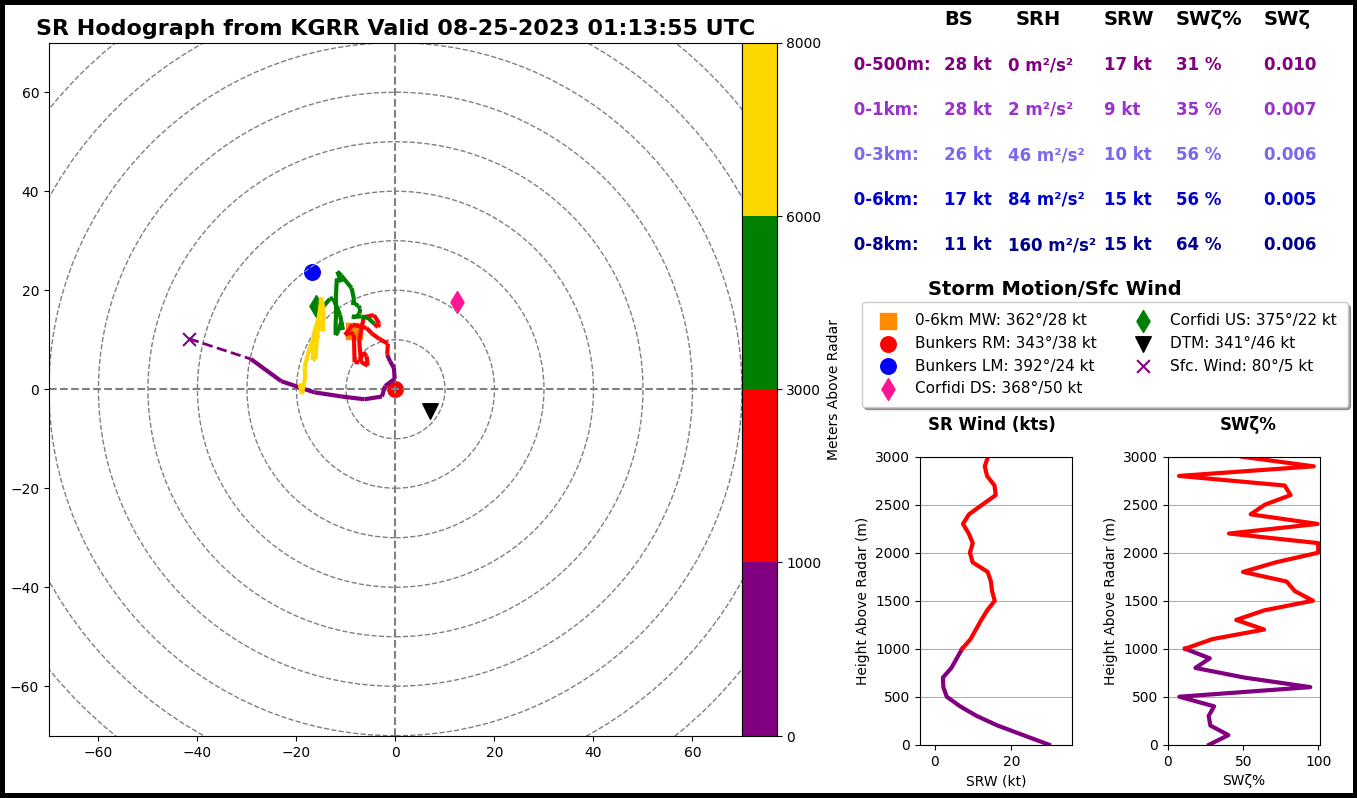

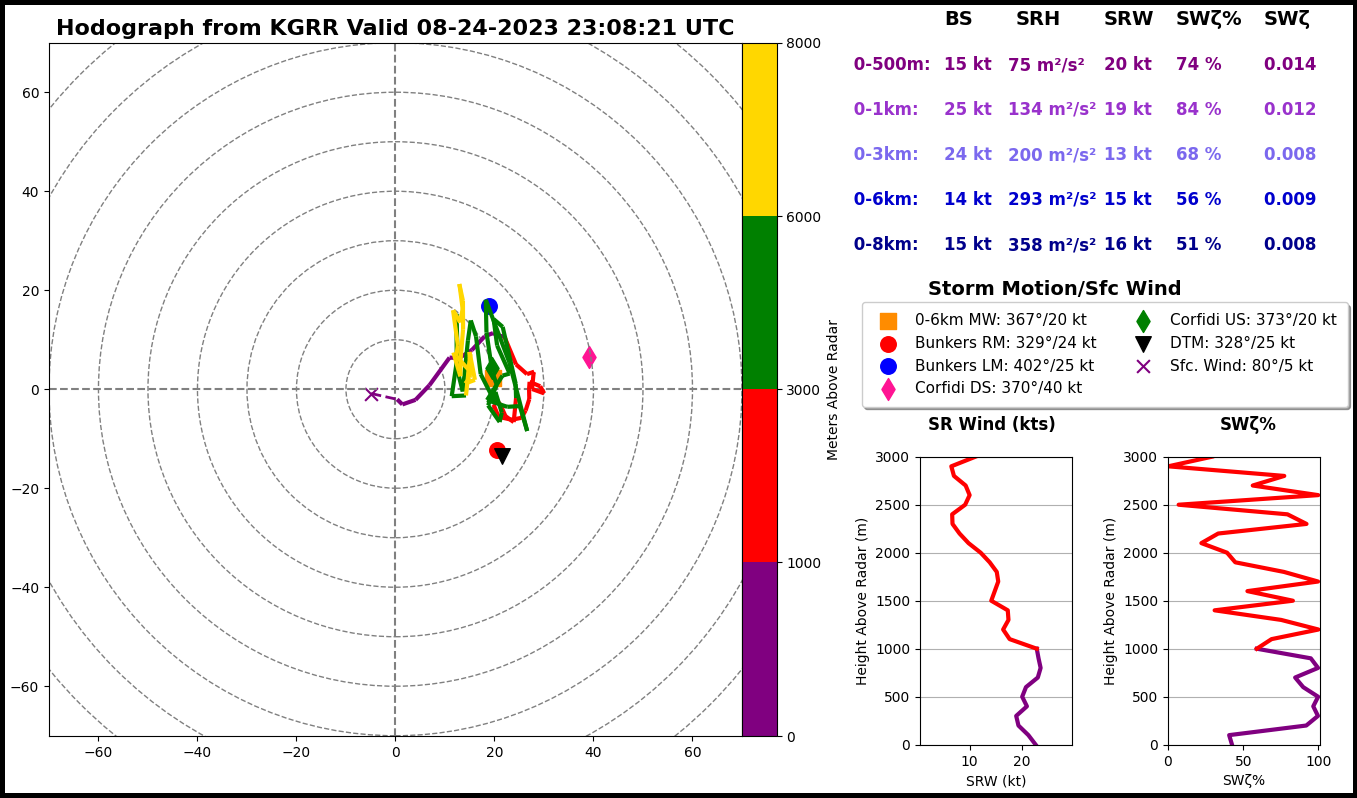

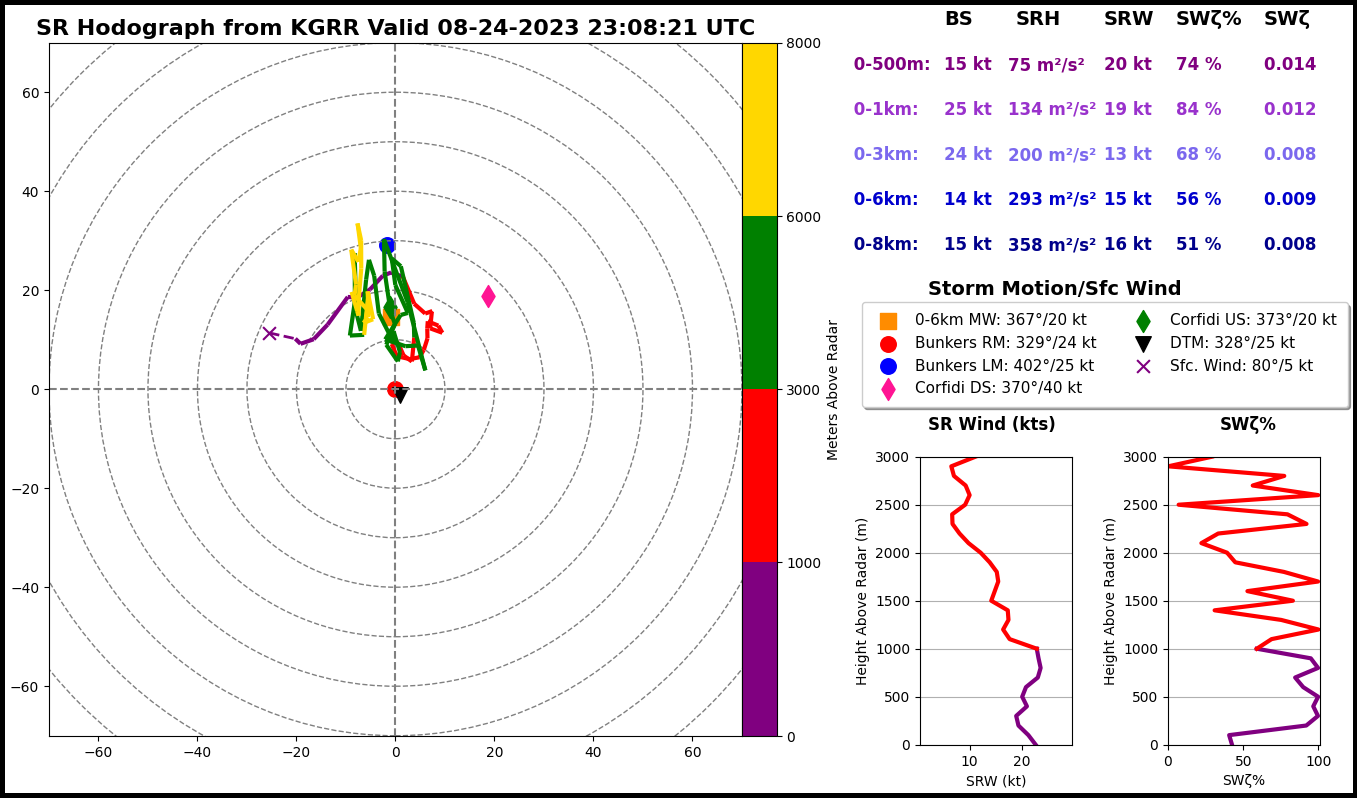

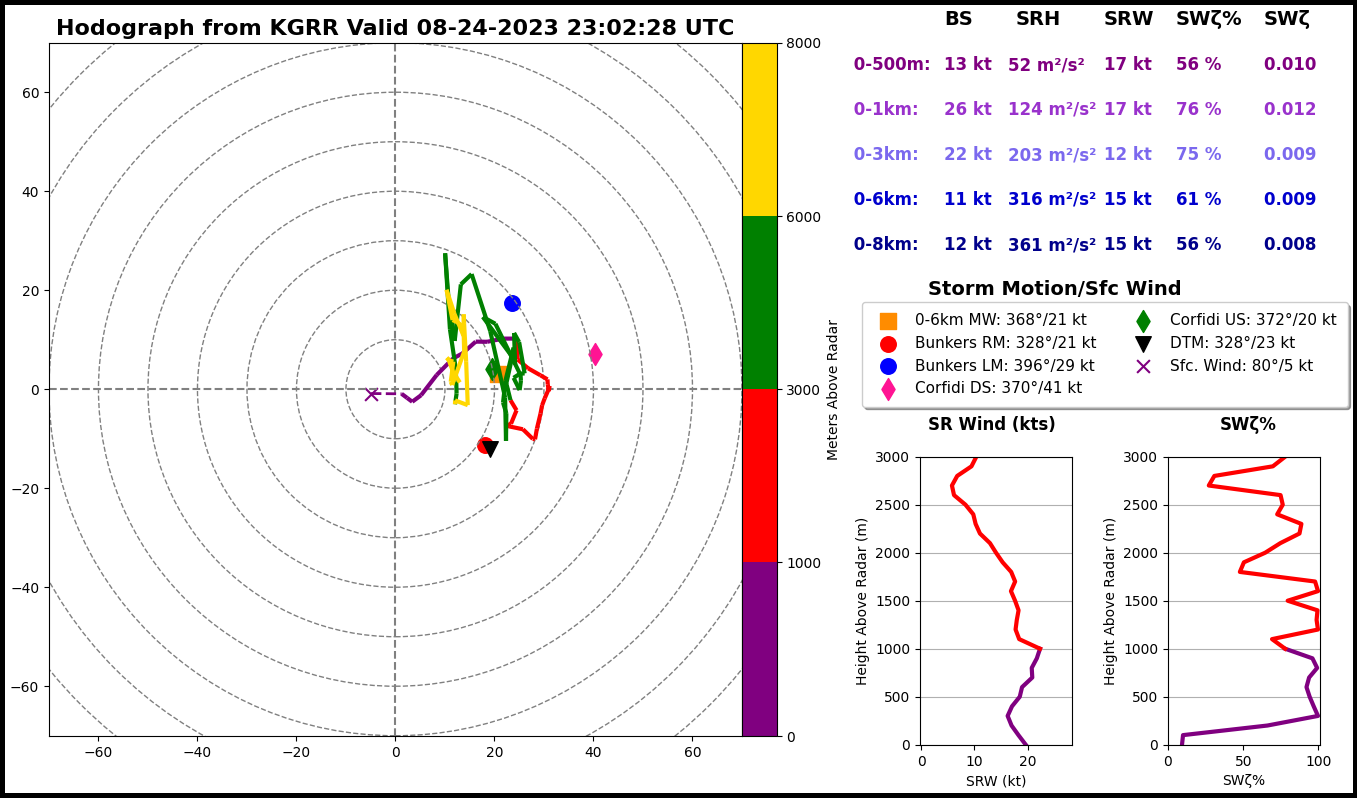

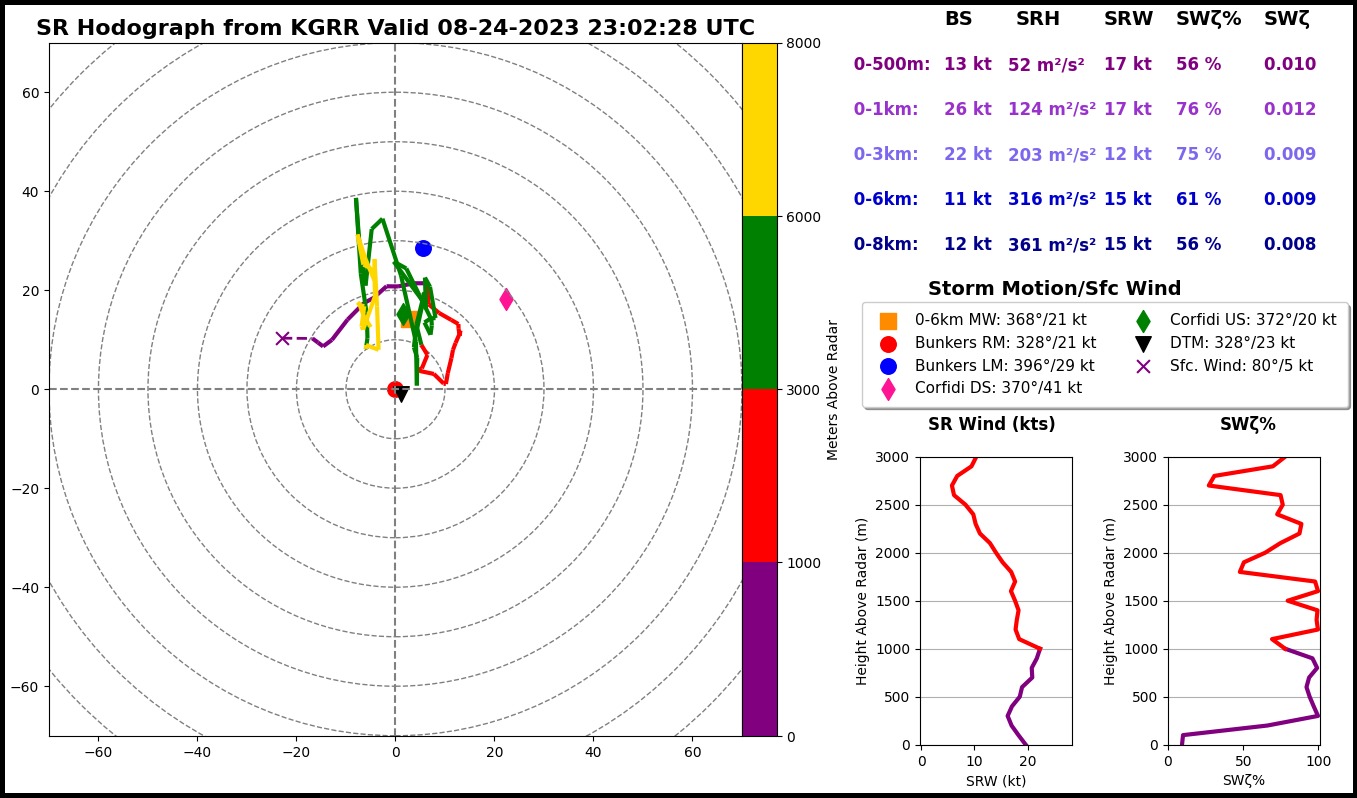

In [101]:
dir = '/content/radar_data'
for file in os.listdir(dir):
  if radar_id.startswith('K') or radar_id.startswith('P'):
    time = file.split('_')[1]
    seg = file.split('_')[0]
    date = seg[4:]

    n = 2

    out = []
    for i in range(0, len(time), n):
        out.append(time[i:i+n])

    datearr = []
    for i in range(0, len(date), n):
        datearr.append(date[i:i+n])

    radar = pyart.io.read(f"/content/radar_data/{file}")
    radar

    # create a gate filter which specifies gates to exclude from dealiasing
    gatefilter = pyart.filters.GateFilter(radar)
    gatefilter.exclude_transition()
    gatefilter.exclude_invalid("velocity")
    gatefilter.exclude_invalid("reflectivity")
    gatefilter.exclude_outside("reflectivity", 0, 80)

    # perform dealiasing
    dealias_data = pyart.correct.dealias_region_based(radar, gatefilter=gatefilter)
    radar.add_field("corrected_velocity", dealias_data)

    pyart.io.write_cfradial(f'/content/cf_radial/{file}.nc', radar, format='NETCDF4')

  if radar_id.startswith('T'):
    time = file.split('_')[1]
    seg = file.split('_')[0]
    date = seg[4:]

    n = 2

    out = []
    for i in range(0, len(time), n):
        out.append(time[i:i+n])

    datearr = []
    for i in range(0, len(date), n):
        datearr.append(date[i:i+n])

    radar = pyart.io.read(file)
    radar

    pyart.io.write_cfradial(f'/content/cf_radial/{file}.nc', radar, format='NETCDF4')

  if radar_id.startswith('K') or radar_id.startswith('P'):
    ncrad = pyart.io.read_cfradial(f'/content/cf_radial/{file}.nc')

    # Loop on all sweeps and compute VAD
    zlevels = np.arange(0, 9000, 100)  # height above radar
    u_allsweeps = []
    v_allsweeps = []

    for idx in range(ncrad.nsweeps):
        radar_1sweep = ncrad.extract_sweeps([idx])
        vad = pyart.retrieve.vad_browning(
            radar_1sweep, "corrected_velocity", z_want=zlevels
        )
        u_allsweeps.append(vad.u_wind)
        v_allsweeps.append(vad.v_wind)

    # Average U and V over all sweeps and compute magnitude and angle
    u_avg = np.nanmean(np.array(u_allsweeps), axis=0)
    v_avg = np.nanmean(np.array(v_allsweeps), axis=0)
    orientation = np.rad2deg(np.arctan2(-u_avg, -v_avg)) % 360
    speed = np.sqrt(u_avg**2 + v_avg**2)
    u_avg *= 1.944
    v_avg *= 1.944

  if radar_id.startswith('T'):
    ncrad = pyart.io.read_cfradial(f'/content/cf_radial/{file}.nc')

    # Loop on all sweeps and compute VAD
    zlevels = np.arange(0, 9000, 100)  # height above radar
    u_allsweeps = []
    v_allsweeps = []

    for idx in range(ncrad.nsweeps):
        radar_1sweep = ncrad.extract_sweeps([idx])
        vad = pyart.retrieve.vad_browning(
            radar_1sweep, "velocity", z_want=zlevels
        )
        u_allsweeps.append(vad.u_wind)
        v_allsweeps.append(vad.v_wind)

    # Average U and V over all sweeps and compute magnitude and angle
    u_avg = np.nanmean(np.array(u_allsweeps), axis=0)
    v_avg = np.nanmean(np.array(v_allsweeps), axis=0)
    orientation = np.rad2deg(np.arctan2(-u_avg, -v_avg)) % 360
    speed = np.sqrt(u_avg**2 + v_avg**2)
    u_avg *= 1.944
    v_avg *= 1.944
    # @title
  API_TOKEN = '86eac26a58a647e69b8c69feaef76bae'
  API_ROOT = "https://api.synopticdata.com/v2/"

  def mesowest_get_sfcwind(api_args):
      """
      For each station in a list of stations, retrieves all observational data
      within a defined time range using mesowest API. Writes the retrieved data
      and associated observation times to a destination file. API documentation:

          https://api.synopticdata.com/v2/stations/nearesttime

      Parameters
      ----------
        api_args  : dictionary


      Returns
      -------
          jas_ts  : json file
                  dictionary of all observations for a given station.
                  What is most significant, however, is writing the
                  observed data to a file that then can be manipulated
                  for plotting.

      """
      station = api_args["stid"]
      api_request_url = os.path.join(API_ROOT, "stations/nearesttime")
      req = requests.get(api_request_url, params=api_args)
      jas_ts = req.json()
      for s in range(0,len(jas_ts['STATION'])):
          try:
              station = jas_ts['STATION'][s]
              stn_id = station['STID']
              ob_times = station['OBSERVATIONS']['wind_speed_value_1']['date_time']
              wnspd = station['OBSERVATIONS']['wind_speed_value_1']['value']
              wndir = station['OBSERVATIONS']['wind_direction_value_1']['value']
          except:
              pass
      return wnspd, wndir
  if sfc_dir == 777:
    api_args = {"token":API_TOKEN, "stid": f"{nearest_asos}", "attime": f"{date}{out[0]}{out[1]}", "within": 60,"status":"active", "units":"speed|kts",  "hfmetars":'1'}
    wnspd, wndir = mesowest_get_sfcwind(api_args)
    sfc_dir = wndir
    sfc_spd = wnspd

    # Define Needed Functions
  def calc_components(speed, direction):
    u_comp = speed * np.cos(np.deg2rad(direction))
    v_comp = speed * np.sin(np.deg2rad(direction))
    return u_comp, v_comp

  def calc_vector(u_comp, v_comp):
    mag = np.sqrt(u_comp**2 + v_comp**2)
    dir = np.rad2deg(np.arctan2(u_comp, v_comp)) % 360
    return mag, dir

  def calc_shear(u_layer, v_layer, height, zlevels):
    layer_top = np.where(zlevels == (height*1000))[0][0]
    u_shr = u_layer[layer_top] - u_layer[0]
    v_shr = v_layer[layer_top] - v_layer[0]
    shrmag = np.hypot(u_shr, v_shr)
    return shrmag

  def calc_meanwind(u_layer, v_layer, zlevels, layertop):
    layer_top = np.where(zlevels == (layertop))[0][0]
    mean_u = np.mean(u_layer[:layer_top])
    mean_v = np.mean(v_layer[:layer_top])
    return mean_u, mean_v

  def calc_bunkers(u_layer, v_layer, zlevels):
    layer_top = np.where(zlevels == (6000))[0][0]
    mean_u = np.mean(u_layer[:layer_top])
    mean_v = np.mean(v_layer[:layer_top])

    layer_top = np.where(zlevels == (6000))[0][0]
    u_shr = u_layer[layer_top] - u_layer[0]
    v_shr = v_layer[layer_top] - v_layer[0]

    dev = 7.5 * 1.94

    dev_amnt = dev / np.hypot(u_shr, v_shr)
    rstu = mean_u + (dev_amnt * v_shr)
    rstv = mean_v - (dev_amnt * u_shr)
    lstu = mean_u - (dev_amnt * v_shr)
    lstv = mean_v + (dev_amnt * u_shr)
    rmag, rdir = calc_vector(rstu, rstv)
    lmag, ldir = calc_vector(lstu, lstv)

    return rstu, rstv, lstu, lstv, rmag, rdir, lmag, ldir

  def calc_corfidi(u_layer, v_layer, zlevels, u_mean, v_mean):
    llj_top = np.where(zlevels == (1500))[0][0]
    llj_u = u_layer[:llj_top]
    llj_v = v_layer[:llj_top]

    mag, dir = calc_vector(llj_u, llj_v)
    max=0
    i=0
    for a in mag:
      if mag[i] >= mag[i-1]:
        max = i

    u_max = llj_u[i]
    v_max = llj_v[i]

    corfidi_up_u = u_mean - u_max
    corfidi_up_v =  v_mean - v_max

    corfidi_down_u = u_mean + corfidi_up_u
    corfidi_down_v = v_mean + corfidi_up_v

    return corfidi_up_u, corfidi_up_v, corfidi_down_u, corfidi_down_v

  def conv_angle(mean_dir, rdir, ldir, sfc_dir, cor_u_dir, cor_d_dir, dtm_dir, us_ang):
    meanang = 270-mean_dir
    meanang +=180
    if meanang < 0:
      meanang += 360

    rang = 270-rdir
    rang +=180
    if rang < 0:
      rang += 360

    lang = 270-ldir
    lang +=180
    if lang < 0:
      lang += 360

    sfcang = 270 - sfc_dir
    if sfcang < 0:
      sfcang += 360

    downdir = 270-cor_d_dir
    downdir +=180
    if downdir < 0:
      downdir += 360

    updir = 270-cor_u_dir
    updir +=180
    if updir < 0:
      updir += 360

    dtm_dir = 270-dtm_dir
    dtm_dir +=180
    if dtm_dir < 0:
      dtm_dir += 360

    us_ang = 270 - us_ang
    if us_ang < 0:
      us_ang += 360
    return meanang, rang, lang, sfcang, downdir, updir, dtm_dir, us_ang

  def calc_dtm(u_300, v_300, rmu, rmv):
    dtm_u = rmu + u_300 /2
    dtm_v = rmv + v_300 /2
    return dtm_u, dtm_v

  #Calculate Bulk Shear
  shr005 = calc_shear(u_avg, v_avg, 0.5, zlevels)
  shr01 = calc_shear(u_avg, v_avg, 1, zlevels)
  shr03 = calc_shear(u_avg, v_avg, 3, zlevels)
  shr06 = calc_shear(u_avg, v_avg, 6, zlevels)
  shr08 = calc_shear(u_avg, v_avg, 8, zlevels)

  #Calculate Storm Motions
  u_mean, v_mean = calc_meanwind(u_avg, v_avg, zlevels, 6000)
  mean_mag, mean_dir = calc_vector(u_mean, v_mean)
  rmu, rmv, lmu, lmv, rmag, rdir, lmag, ldir = calc_bunkers(u_avg, v_avg, zlevels)
  cvu_u, cvu_v, cvd_u, cvd_v = calc_corfidi(u_avg, v_avg, zlevels, u_mean, v_mean)

  cor_u_mag, cor_u_dir = calc_vector(cvu_u, cvu_v)
  cor_d_mag, cor_d_dir = calc_vector(cvd_u, cvd_v)

  #Calculate Deviant Tornado Motion
  u_300, v_300 = calc_meanwind(u_avg, v_avg, zlevels, 300)
  dtm_u, dtm_v = calc_dtm(u_300, v_300, rmu, rmv)
  dtm_mag, dtm_dir = calc_vector(dtm_u, dtm_v)

  #Calculate meteorological angles
  mean_dirmet, rang, lang, sfc_angle, down_adj, up_adj, dtm_dir_cor, us_ang_cor = conv_angle(mean_dir, rdir, ldir, sfc_dir, cor_u_dir, cor_d_dir, dtm_dir, sm_dir)

  #Calculate Sfc Winds
  if sfc_dir != 999:
    sfc_u, sfc_v = calc_components(sfc_spd, sfc_angle)

  if sm_dir != 999:
    u_sm, v_sm = calc_components(sm_speed, us_ang_cor)

  #Create Storm Relative Flow Based On Selected Data
  if storm_motion_method == 'Mean Wind':
    sr_u = u_avg - u_mean
    sr_v = v_avg - v_mean
    sr_mw_u = u_mean - u_mean
    sr_br_u = rmu - u_mean
    sr_bl_u = lmu - u_mean
    sr_mw_v = v_mean - v_mean
    sr_br_v = rmv - v_mean
    sr_bl_v = lmv - v_mean
    sr_sfc_u = sfc_u - u_mean
    sr_sfc_v = sfc_v - v_mean
    sr_cu_u =  cvu_u - u_mean
    sr_cd_u = cvd_u - u_mean
    sr_cu_v = cvu_v - v_mean
    sr_cd_v = cvd_v - v_mean
    sr_dtm_u = dtm_u - u_mean
    sr_dtm_v = dtm_v - v_mean
  if storm_motion_method == 'User Selected':
    sr_u = u_avg - u_sm
    sr_v = v_avg - v_sm
    sr_mw_u = u_mean - u_sm
    sr_br_u = rmu - u_sm
    sr_bl_u = lmu - u_sm
    sr_mw_v = v_mean - v_sm
    sr_br_v = rmv - v_sm
    sr_bl_v = lmv - v_sm
    sr_sfc_u = sfc_u - u_sm
    sr_sfc_v = sfc_v - v_sm
    sr_cu_u =  cvu_u - u_sm
    sr_cd_u = cvd_u - u_sm
    sr_cu_v = cvu_v - v_sm
    sr_cd_v = cvd_v - v_sm
    sr_dtm_u = dtm_u - u_sm
    sr_dtm_v = dtm_v - v_sm
    sr_sm_u = u_sm - u_sm
    sr_sm_v = v_sm - v_sm
  if storm_motion_method == 'Bunkers Right':
    sr_u = u_avg - rmu
    sr_v = v_avg - rmv
    sr_mw_u = u_mean - rmu
    sr_br_u = rmu - rmu
    sr_bl_u = lmu - rmu
    sr_mw_v = v_mean - rmv
    sr_br_v = rmv - rmv
    sr_bl_v = lmv - rmv
    sr_sfc_u = sfc_u - rmu
    sr_sfc_v = sfc_v - rmv
    sr_cu_u =  cvu_u - rmu
    sr_cd_u = cvd_u - rmu
    sr_cu_v = cvu_v - rmv
    sr_cd_v = cvd_v - rmv
    sr_dtm_u = dtm_u - rmu
    sr_dtm_v = dtm_v - rmv
  if storm_motion_method == 'Bunkers Left':
    sr_u = u_avg - lmu
    sr_v = v_avg - lmv
    sr_mw_u = u_mean - lmu
    sr_br_u = rmu - lmu
    sr_bl_u = lmu - lmu
    sr_mw_v = v_mean - lmv
    sr_br_v = rmv - lmv
    sr_bl_v = lmv - lmv
    sr_sfc_u = sfc_u - lmu
    sr_sfc_v = sfc_v - lmv
    sr_cu_u =  cvu_u - lmu
    sr_cd_u = cvd_u - lmu
    sr_cu_v = cvu_v - lmv
    sr_cd_v = cvd_v - lmv
    sr_dtm_u = dtm_u - lmu
    sr_dtm_v = dtm_v - lmv
  if storm_motion_method == 'Corfidi Downshear':
    sr_u = u_avg - cvd_u
    sr_v = v_avg - cvd_v
    sr_mw_u = u_mean - cvd_u
    sr_br_u = rmu - cvd_u
    sr_bl_u = lmu - cvd_u
    sr_mw_v = v_mean - cvd_v
    sr_br_v = rmv - cvd_v
    sr_bl_v = lmv - cvd_v
    sr_sfc_u = sfc_u - cvd_u
    sr_sfc_v = sfc_v - cvd_v
    sr_cu_u =  cvu_u - cvd_u
    sr_cd_u = cvd_u - cvd_u
    sr_cu_v = cvu_v - cvd_v
    sr_cd_v = cvd_v - cvd_v
    sr_dtm_u = dtm_u - cvd_u
    sr_dtm_v = dtm_v - cvd_v
  if storm_motion_method == 'Corfidi Upshear':
    sr_u = u_avg - cvu_u
    sr_v = v_avg - cvu_v
    sr_mw_u = u_mean - cvu_u
    sr_br_u = rmu - cvu_u
    sr_bl_u = lmu - cvu_u
    sr_mw_v = v_mean - cvu_v
    sr_br_v = rmv - cvu_v
    sr_bl_v = lmv - cvu_v
    sr_sfc_u = sfc_u - cvu_u
    sr_sfc_v = sfc_v - cvu_v
    sr_cu_u =  cvu_u - cvu_u
    sr_cd_u = cvd_u - cvu_u
    sr_cu_v = cvu_v - cvu_v
    sr_cd_v = cvd_v - cvu_v
    sr_dtm_u = dtm_u - cvu_u
    sr_dtm_v = dtm_v - cvu_v

  #Calculate SRH from RM Motion
  SRH05 = (mpcalc.storm_relative_helicity(height = zlevels * units.m, u = u_avg * units.kts, v = v_avg*units.kts, depth = 0.5*units.km, storm_u=rmu*units.kts, storm_v=rmv*units.kts))[0]
  SRH1 = (mpcalc.storm_relative_helicity(height = zlevels * units.m, u = u_avg * units.kts, v = v_avg*units.kts, depth = 1*units.km, storm_u=rmu*units.kts, storm_v=rmv*units.kts))[0]
  SRH3 = (mpcalc.storm_relative_helicity(height = zlevels * units.m, u = u_avg * units.kts, v = v_avg*units.kts, depth = 3*units.km, storm_u=rmu*units.kts, storm_v=rmv*units.kts))[0]
  SRH6 = (mpcalc.storm_relative_helicity(height = zlevels * units.m, u = u_avg * units.kts, v = v_avg*units.kts, depth = 6*units.km, storm_u=rmu*units.kts, storm_v=rmv*units.kts))[0]
  SRH8 = (mpcalc.storm_relative_helicity(height = zlevels * units.m, u = u_avg * units.kts, v = v_avg*units.kts, depth = 8*units.km, storm_u=rmu*units.kts, storm_v=rmv*units.kts))[0]
  SRH_units = (units.m*units.m)/(units.s*units.s)
  ureg=UnitRegistry()
  SRH05=ureg(str(SRH05)).m
  SRH1=ureg(str(SRH1)).m
  SRH3=ureg(str(SRH3)).m
  SRH6=ureg(str(SRH6)).m
  SRH8=ureg(str(SRH8)).m

  #Calculate SR Wind

  SR_05U, SR_05V = calc_meanwind(sr_u, sr_v, zlevels, 500)
  SR_1U, SR_1V = calc_meanwind(sr_u, sr_v, zlevels, 1000)
  SR_3U, SR_3V = calc_meanwind(sr_u, sr_v, zlevels, 3000)
  SR_6U, SR_6V = calc_meanwind(sr_u, sr_v, zlevels, 6000)
  SR_8U, SR_8V = calc_meanwind(sr_u, sr_v, zlevels, 8000)

  SR05 = calc_vector(SR_05U, SR_05V)[0]
  SR1 = calc_vector(SR_1U, SR_1V)[0]
  SR3 = calc_vector(SR_3U, SR_3V)[0]
  SR6 = calc_vector(SR_6U, SR_6V)[0]
  SR8 = calc_vector(SR_8U, SR_8V)[0]


  #Calculate Streamwise Vorticity

  # adopted from Sam Brandt (2022)  and Kyle Gillett (2023)
  # CONVERT TO m/s (uses `sm_u, sm_v` calculated above)
  u_ms = (u_avg/1.94384)
  v_ms = (v_avg/1.94384)
  sm_u_ms = (sr_u/1.94384)
  sm_v_ms = (sr_v/1.94384)

  # INTEROPLATED SRW (send back to knots)
  srw = mpcalc.wind_speed(sm_u_ms*units('m/s'), sm_v_ms*units('m/s'))
  srw_knots = (srw.m*1.94384)

  # SHEAR COMPONENTS FOR VORT CALC
  # calc example = change in u over change in z
  dudz = (u_ms[2::]-u_ms[0:-2]) / (zlevels[2::]-zlevels[0:-2])
  dvdz = (v_ms[2::]-v_ms[0:-2]) / (zlevels[2::]-zlevels[0:-2])
  dudz = np.insert(dudz,0,dudz[0])
  dudz = np.insert(dudz,-1,dudz[-1])
  dvdz = np.insert(dvdz,0,dvdz[0])
  dvdz = np.insert(dvdz,-1,dvdz[-1])
  # Shear magnitude,
  shear=(np.sqrt(dudz**2+dvdz**2)+0.0000001)
  # Vorticity components
  uvort=-dvdz
  vvort=dudz
  # Total horizontal vorticity
  totvort = np.sqrt(uvort**2 + vvort**2)
  # Total streamwise vorticity
  total_swvort = abs((sm_u_ms*uvort+sm_v_ms*vvort)/(np.sqrt(sm_u_ms**2+sm_v_ms**2)))
  # Streamwiseness fraction
  swvper = (total_swvort/shear)*100

  # layer average streamwiseness and total streamwise vorticity
  swper05  = np.mean(swvper[0:5])
  swper1 = np.mean(swvper[0:10])
  swper3 = np.mean(swvper[0:30])
  swper6 = np.mean(swvper[0:60])
  swper8 = np.mean(swvper[0:80])
  swvort05       = np.mean(total_swvort[0:5])
  swvort1      = np.mean(total_swvort[0:10])
  swvort3      = np.mean(total_swvort[0:30])
  swvort6      = np.mean(total_swvort[0:60])
  swvort8      = np.mean(total_swvort[0:80])
  swvort_units = units.s**-1
  sr_spd = calc_vector(sr_u, sr_v)[0]

  # @title
  def round_up_nearest(n):
      return 5 * math.ceil(n / 5)

  #Create Figure
  fig = plt.figure(figsize=(16,9), facecolor='white', edgecolor="black", linewidth = 6)
  ax=fig.add_subplot(1,1,1)
  if range_type == 'Dynamic':
    #Determine Component Ring For Dynamic
    magar = []
    magar.append(speed.max())
    magar.append(mean_mag)
    magar.append(rmag)
    magar.append(lmag)
    magar.append(cor_d_mag)
    magar.append(cor_u_mag)
    magar.append(dtm_mag)
    max2 = max(magar)
    hodo_rang = round_up_nearest(max2+10)
    h = Hodograph(ax, component_range = hodo_rang)
  if range_type == 'Static':
    h = Hodograph(ax, component_range = static_value)
  h.add_grid(increment = 10)

  #Create Colormap
  boundaries = np.array([0,1000,3000,6000,8000])
  colors = ['purple', 'red', 'green', 'gold']

  #Plot Hodograph and Winds
  l = h.plot_colormapped(u_avg, v_avg, zlevels, intervals = boundaries, colors = colors)
  mw = ax.scatter(u_mean, v_mean, color = 'darkorange', marker = 's', label = f"0-6km MW: {'{:.0f}'.format(mean_dirmet)}°/{'{:.0f} kt'.format(mean_mag)}", s = 125)
  rm = ax.scatter(rmu, rmv, color = 'red', marker = 'o', label = f"Bunkers RM: {'{:.0f}'.format(rang)}°/{'{:.0f} kt'.format(rmag)}", s = 125)
  lm = ax.scatter(lmu, lmv, color = 'blue', marker = 'o', label = f"Bunkers LM: {'{:.0f}'.format(lang)}°/{'{:.0f} kt'.format(lmag)}", s = 125)
  cd = ax.scatter(cvd_u, cvd_v, color = 'deeppink', marker = 'd', s = 125, label = f"Corfidi DS: {'{:.0f}'.format(down_adj)}°/{'{:.0f} kt'.format(cor_d_mag)}")
  cu = ax.scatter(cvu_u, cvu_v, color = 'green', marker = 'd', s = 125, label = f"Corfidi US: {'{:.0f}'.format(up_adj)}°/{'{:.0f} kt'.format(cor_u_mag)}")
  dtm = ax.scatter(dtm_u, dtm_v, color = 'black', marker = 'v', s = 125, label = f"DTM: {'{:.0f}'.format(dtm_dir_cor)}°/{'{:.0f} kt'.format(dtm_mag)} ")

  if sm_dir != 999:
    us = ax.scatter(u_sm, v_sm, color = 'black', marker = 'x', label = f"User SM: {'{:.0f}'.format(sm_dir)}/{'{:.0f}'.format(sm_speed)}", s = 125)
  if sfc_dir != 999:
    sfc = ax.scatter(sfc_u, sfc_v, color = 'purple', marker = 'x', s = 85, label = f"Sfc. Wind: {'{:.0f}'.format(sfc_dir)}°/{'{:.0f} kt'.format(sfc_spd)}")
    plt.plot([sfc_u, u_avg[0]], [sfc_v, v_avg[0]], color="purple", linestyle = '--', linewidth = 2)

  #Add Colorbar and Fig Text
  CS = plt.colorbar(l, pad=0.00)
  CS.set_label('Meters Above Radar')

  plt.figtext(0.91, 0.9, "BS", fontsize = 14, weight = 'bold')
  plt.figtext(0.955, 0.9, "SRH", fontsize = 14, weight = 'bold')
  plt.figtext(1.01, 0.9, "SRW", fontsize = 14, weight = 'bold')
  plt.figtext(1.055, 0.9, "SWζ%", fontsize = 14, weight = 'bold')
  plt.figtext(1.11, 0.9, f"SWζ", fontsize = 14, weight = 'bold')

  plt.figtext(0.85,0.85, f" 0-500m:", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(0.91,0.85, f"{'{:.0f}'.format(shr005)} kt", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(0.95,0.85, f"{'{:.0f}'.format(SRH05) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.01,0.85, f"{'{:.0f}'.format(SR05) } kt", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.055,0.85, f"{'{:.0f}'.format(swper05) } %", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.11,0.85, f"{'{:.3f}'.format(swvort05)} ", fontsize = 12, weight = 'bold', color = 'purple')

  plt.figtext(0.85,0.80, f" 0-1km: ", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(0.91,0.80, f"{'{:.0f}'.format(shr01)} kt", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(0.95,0.80, f"{'{:.0f}'.format(SRH1) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.01,0.80, f"{'{:.0f}'.format(SR1) } kt", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.055,0.80, f"{'{:.0f}'.format(swper1) } %", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.11,0.80, f"{'{:.3f}'.format(swvort1)} ", fontsize = 12, weight = 'bold', color = 'darkorchid')

  plt.figtext(0.85,0.75, f" 0-3km: ", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(0.91,0.75, f"{'{:.0f}'.format(shr03)} kt", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(0.95,0.75, f"{'{:.0f}'.format(SRH3) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.01,0.75, f"{'{:.0f}'.format(SR3) } kt", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.055,0.75, f"{'{:.0f}'.format(swper3) } %", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.11,0.75, f"{'{:.3f}'.format(swvort3)} ", fontsize = 12, weight = 'bold', color = 'mediumslateblue')

  plt.figtext(0.85,0.70, f" 0-6km: ", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(0.91,0.70, f"{'{:.0f}'.format(shr06)} kt", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(0.95,0.70, f"{'{:.0f}'.format(SRH6) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.01,0.70, f"{'{:.0f}'.format(SR6) } kt", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.055,0.70, f"{'{:.0f}'.format(swper6) } %", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.11,0.70, f"{'{:.3f}'.format(swvort6)} ", fontsize = 12, weight = 'bold', color = 'mediumblue')

  plt.figtext(0.85,0.65, f" 0-8km: ", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(0.91,0.65, f"{'{:.0f}'.format(shr08)} kt", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(0.95,0.65, f"{'{:.0f}'.format(SRH8) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.01,0.65, f"{'{:.0f}'.format(SR8) } kt", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.055,0.65, f"{'{:.0f}'.format(swper8) } %", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.11,0.65, f"{'{:.3f}'.format(swvort8)} ", fontsize = 12, weight = 'bold', color = 'darkblue')

  plt.figtext(0.90,0.60, "Storm Motion/Sfc Wind", fontsize = 14, weight = 'bold')

  plt.legend(loc = 'right', bbox_to_anchor=(1.885, 0.55),
            ncol=2, fancybox=True, shadow=True, fontsize=11, facecolor='white', framealpha=1.0,
              labelcolor='k', borderpad=0.7)
  plt.title(f'Hodograph from {radar_id} Valid {datearr[2]}-{datearr[3]}-{datearr[0]}{datearr[1]} {out[0]}:{out[1]}:{out[2]} {timezone}', fontsize = 16, weight = 'bold')

  try:
    #Plot SRW wrt Hgt
    sr_plot = plt.axes((0.895, 0.10, 0.095, 0.32))
    plt.figtext(0.94, 0.45, f'SR Wind (kts)', weight='bold', color='black', fontsize=12, ha='center')
    sr_plot.set_ylim(0,3000)
    sr_plot.set_xlim(sr_spd[0:31].min() -6,sr_spd[0:31].max() +6)
    sr_plot.plot(sr_spd[0:11], zlevels[0:11], color = 'purple', linewidth = 3)
    sr_plot.plot(sr_spd[10:31], zlevels[10:31], color = 'red', linewidth = 3)
    plt.ylabel('Height Above Radar (m)')
    plt.xlabel('SRW (kt)')
    plt.grid(axis='y')
  except:
    pass

  try:
    #Plot SW Vort Perc wrt Hgt
    swv_plot = plt.axes((1.05, 0.10, 0.095, 0.32))
    plt.figtext(1.1, 0.45, f'SWζ%', weight='bold', color='black', fontsize=12, ha='center')
    swv_plot.set_ylim(0,3000)
    swv_plot.set_xlim(00,101)
    swv_plot.plot(swvper[0:11], zlevels[0:11], color = 'purple', linewidth = 3)
    swv_plot.plot(swvper[10:31], zlevels[10:31], color = 'red', linewidth = 3)
    plt.ylabel('Height Above Radar (m)')
    plt.xlabel('SWζ%')
    plt.grid(axis='y')
  except:
    pass
  #Add Title and Legend and Save Figure

  plt.savefig(f'/content/hodos/Hodograph_{radar_id}_{date}_{time}.png', bbox_inches='tight')

  # @title
  def round_up_nearest(n):
      return 5 * math.ceil(n / 5)

  #Create Figure
  fig = plt.figure(figsize=(16,9), facecolor='white', edgecolor="black", linewidth = 6)
  ax=fig.add_subplot(1,1,1)
  if range_type == 'Dynamic':
    #Determine Component Ring For Dynamic
    magar = []
    magar.append(speed.max())
    magar.append(mean_mag)
    magar.append(rmag)
    magar.append(lmag)
    magar.append(cor_d_mag)
    magar.append(cor_u_mag)
    magar.append(dtm_mag)
    max2 = max(magar)
    hodo_rang = round_up_nearest(max2+10)
    h = Hodograph(ax, component_range = hodo_rang)
  if range_type == 'Static':
    h = Hodograph(ax, component_range = static_value)
  h.add_grid(increment = 10)

  #Create Colormap
  boundaries = np.array([0,1000,3000,6000,8000])
  colors = ['purple', 'red', 'green', 'gold']

  #Plot Hodograph and Winds
  l = h.plot_colormapped(sr_u, sr_v, zlevels, intervals = boundaries, colors = colors)
  mw = ax.scatter(sr_mw_u, sr_mw_v, color = 'darkorange', marker = 's', label = f"0-6km MW: {'{:.0f}'.format(mean_dirmet)}°/{'{:.0f} kt'.format(mean_mag)}", s = 125)
  rm = ax.scatter(sr_br_u, sr_br_v, color = 'red', marker = 'o', label = f"Bunkers RM: {'{:.0f}'.format(rang)}°/{'{:.0f} kt'.format(rmag)}", s = 125)
  lm = ax.scatter(sr_bl_u, sr_bl_v, color = 'blue', marker = 'o', label = f"Bunkers LM: {'{:.0f}'.format(lang)}°/{'{:.0f} kt'.format(lmag)}", s = 125)
  cd = ax.scatter(sr_cd_u, sr_cd_v, color = 'deeppink', marker = 'd', s = 125, label = f"Corfidi DS: {'{:.0f}'.format(down_adj)}°/{'{:.0f} kt'.format(cor_d_mag)}")
  cu = ax.scatter(sr_cu_u, sr_cu_v, color = 'green', marker = 'd', s = 125, label = f"Corfidi US: {'{:.0f}'.format(up_adj)}°/{'{:.0f} kt'.format(cor_u_mag)}")
  dtm = ax.scatter(sr_dtm_u, sr_dtm_v, color = 'black', marker = 'v', s = 125, label = f"DTM: {'{:.0f}'.format(dtm_dir_cor)}°/{'{:.0f} kt'.format(dtm_mag)} ")

  if sm_dir != 999:
    us = ax.scatter(sr_sm_u, sr_sm_v, color = 'black', marker = 'x', label = f"User SM: {'{:.0f}'.format(sm_dir)}/{'{:.0f}'.format(sm_speed)}", s = 125)
  if sfc_dir != 999:
    sfc = ax.scatter(sr_sfc_u, sr_sfc_v, color = 'purple', marker = 'x', s = 85, label = f"Sfc. Wind: {'{:.0f}'.format(sfc_dir)}°/{'{:.0f} kt'.format(sfc_spd)}")
    plt.plot([sr_sfc_u, sr_u[0]], [sr_sfc_v, sr_v[0]], color="purple", linestyle = '--', linewidth = 2)

  #Add Colorbar and Fig Text
  CS = plt.colorbar(l, pad=0.00)
  CS.set_label('Meters Above Radar')

  plt.figtext(0.91, 0.9, "BS", fontsize = 14, weight = 'bold')
  plt.figtext(0.955, 0.9, "SRH", fontsize = 14, weight = 'bold')
  plt.figtext(1.01, 0.9, "SRW", fontsize = 14, weight = 'bold')
  plt.figtext(1.055, 0.9, "SWζ%", fontsize = 14, weight = 'bold')
  plt.figtext(1.11, 0.9, f"SWζ", fontsize = 14, weight = 'bold')

  plt.figtext(0.85,0.85, f" 0-500m:", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(0.91,0.85, f"{'{:.0f}'.format(shr005)} kt", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(0.95,0.85, f"{'{:.0f}'.format(SRH05) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.01,0.85, f"{'{:.0f}'.format(SR05) } kt", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.055,0.85, f"{'{:.0f}'.format(swper05) } %", fontsize = 12, weight = 'bold', color = 'purple')
  plt.figtext(1.11,0.85, f"{'{:.3f}'.format(swvort05)} ", fontsize = 12, weight = 'bold', color = 'purple')

  plt.figtext(0.85,0.80, f" 0-1km: ", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(0.91,0.80, f"{'{:.0f}'.format(shr01)} kt", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(0.95,0.80, f"{'{:.0f}'.format(SRH1) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.01,0.80, f"{'{:.0f}'.format(SR1) } kt", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.055,0.80, f"{'{:.0f}'.format(swper1) } %", fontsize = 12, weight = 'bold', color = 'darkorchid')
  plt.figtext(1.11,0.80, f"{'{:.3f}'.format(swvort1)} ", fontsize = 12, weight = 'bold', color = 'darkorchid')

  plt.figtext(0.85,0.75, f" 0-3km: ", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(0.91,0.75, f"{'{:.0f}'.format(shr03)} kt", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(0.95,0.75, f"{'{:.0f}'.format(SRH3) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.01,0.75, f"{'{:.0f}'.format(SR3) } kt", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.055,0.75, f"{'{:.0f}'.format(swper3) } %", fontsize = 12, weight = 'bold', color = 'mediumslateblue')
  plt.figtext(1.11,0.75, f"{'{:.3f}'.format(swvort3)} ", fontsize = 12, weight = 'bold', color = 'mediumslateblue')

  plt.figtext(0.85,0.70, f" 0-6km: ", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(0.91,0.70, f"{'{:.0f}'.format(shr06)} kt", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(0.95,0.70, f"{'{:.0f}'.format(SRH6) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.01,0.70, f"{'{:.0f}'.format(SR6) } kt", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.055,0.70, f"{'{:.0f}'.format(swper6) } %", fontsize = 12, weight = 'bold', color = 'mediumblue')
  plt.figtext(1.11,0.70, f"{'{:.3f}'.format(swvort6)} ", fontsize = 12, weight = 'bold', color = 'mediumblue')

  plt.figtext(0.85,0.65, f" 0-8km: ", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(0.91,0.65, f"{'{:.0f}'.format(shr08)} kt", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(0.95,0.65, f"{'{:.0f}'.format(SRH8) * SRH_units:~P}", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.01,0.65, f"{'{:.0f}'.format(SR8) } kt", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.055,0.65, f"{'{:.0f}'.format(swper8) } %", fontsize = 12, weight = 'bold', color = 'darkblue')
  plt.figtext(1.11,0.65, f"{'{:.3f}'.format(swvort8)} ", fontsize = 12, weight = 'bold', color = 'darkblue')

  plt.figtext(0.90,0.60, "Storm Motion/Sfc Wind", fontsize = 14, weight = 'bold')

  plt.legend(loc = 'right', bbox_to_anchor=(1.885, 0.55),
            ncol=2, fancybox=True, shadow=True, fontsize=11, facecolor='white', framealpha=1.0,
              labelcolor='k', borderpad=0.7)
  plt.title(f'SR Hodograph from {radar_id} Valid {datearr[2]}-{datearr[3]}-{datearr[0]}{datearr[1]} {out[0]}:{out[1]}:{out[2]} {timezone}', fontsize = 16, weight = 'bold')

  try:
  #Plot SRW wrt Hgt
    sr_plot = plt.axes((0.895, 0.10, 0.095, 0.32))
    plt.figtext(0.94, 0.45, f'SR Wind (kts)', weight='bold', color='black', fontsize=12, ha='center')
    sr_plot.set_ylim(0,3000)
    sr_plot.set_xlim(sr_spd[0:31].min() -6,sr_spd[0:31].max() +6)
    sr_plot.plot(sr_spd[0:11], zlevels[0:11], color = 'purple', linewidth = 3)
    sr_plot.plot(sr_spd[10:31], zlevels[10:31], color = 'red', linewidth = 3)
    plt.ylabel('Height Above Radar (m)')
    plt.xlabel('SRW (kt)')
    plt.grid(axis='y')
  except:
    pass

  try:
    #Plot SW Vort Perc wrt Hgt
    swv_plot = plt.axes((1.05, 0.10, 0.095, 0.32))
    plt.figtext(1.1, 0.45, f'SWζ%', weight='bold', color='black', fontsize=12, ha='center')
    swv_plot.set_ylim(0,3000)
    swv_plot.set_xlim(00,101)
    swv_plot.plot(swvper[0:11], zlevels[0:11], color = 'purple', linewidth = 3)
    swv_plot.plot(swvper[10:31], zlevels[10:31], color = 'red', linewidth = 3)
    plt.ylabel('Height Above Radar (m)')
    plt.xlabel('SWζ%')
    plt.grid(axis='y')
  except:
    pass
  #Add Title and Legend and Save Figure

  plt.savefig(f'/content/sr_hodos/SR_Hodograph_{radar_id}_{date}_{time}.png', bbox_inches='tight')
  print(f"Hodographs for {radar_id} Valid {datearr[2]}-{datearr[3]}-{datearr[0]}{datearr[1]} {out[0]}:{out[1]}:{out[2]} {timezone} Complete")